In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
from environment.single_family_home import SingleFamilyHome
import matplotlib.dates as mdates
import numpy as np
from analysis import *
# Enable LaTeX fonts
plt.rcParams['text.usetex'] = True

In [3]:
env = SingleFamilyHome(config= "./environment/configs/config_hourly.json")
env.reset()

({'carbon_intensity': array([40.17], dtype=float32),
  'household_energy_demand': array([0.], dtype=float32),
  'rooftop_solar_generation': array([-0.303], dtype=float32),
  'energy_storage_system_charge': array([0.], dtype=float32),
  'flexible_demand_schedule': array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.1784333 , 0.        , 0.6622    ,
         0.56803334, 0.        , 1.1524667 , 0.        , 1.0334    ,
         0.12616667, 0.        , 0.806227  , 0.        , 1.1511333 ],
        dtype=float32),
  'tcl_indoor_temperature': array([20.], dtype=float32),
  'month_of_year': array([1.], dtype=float32),
  'solar_irradiation': array([0.], dtype=float32),
  'solar_elevation': array([0.], dtype=float32),
  'temperature': array([12.44], dtype=float32),
  'wind_speed': array([8.21], dtype=float32)},
 {})

# Presentation

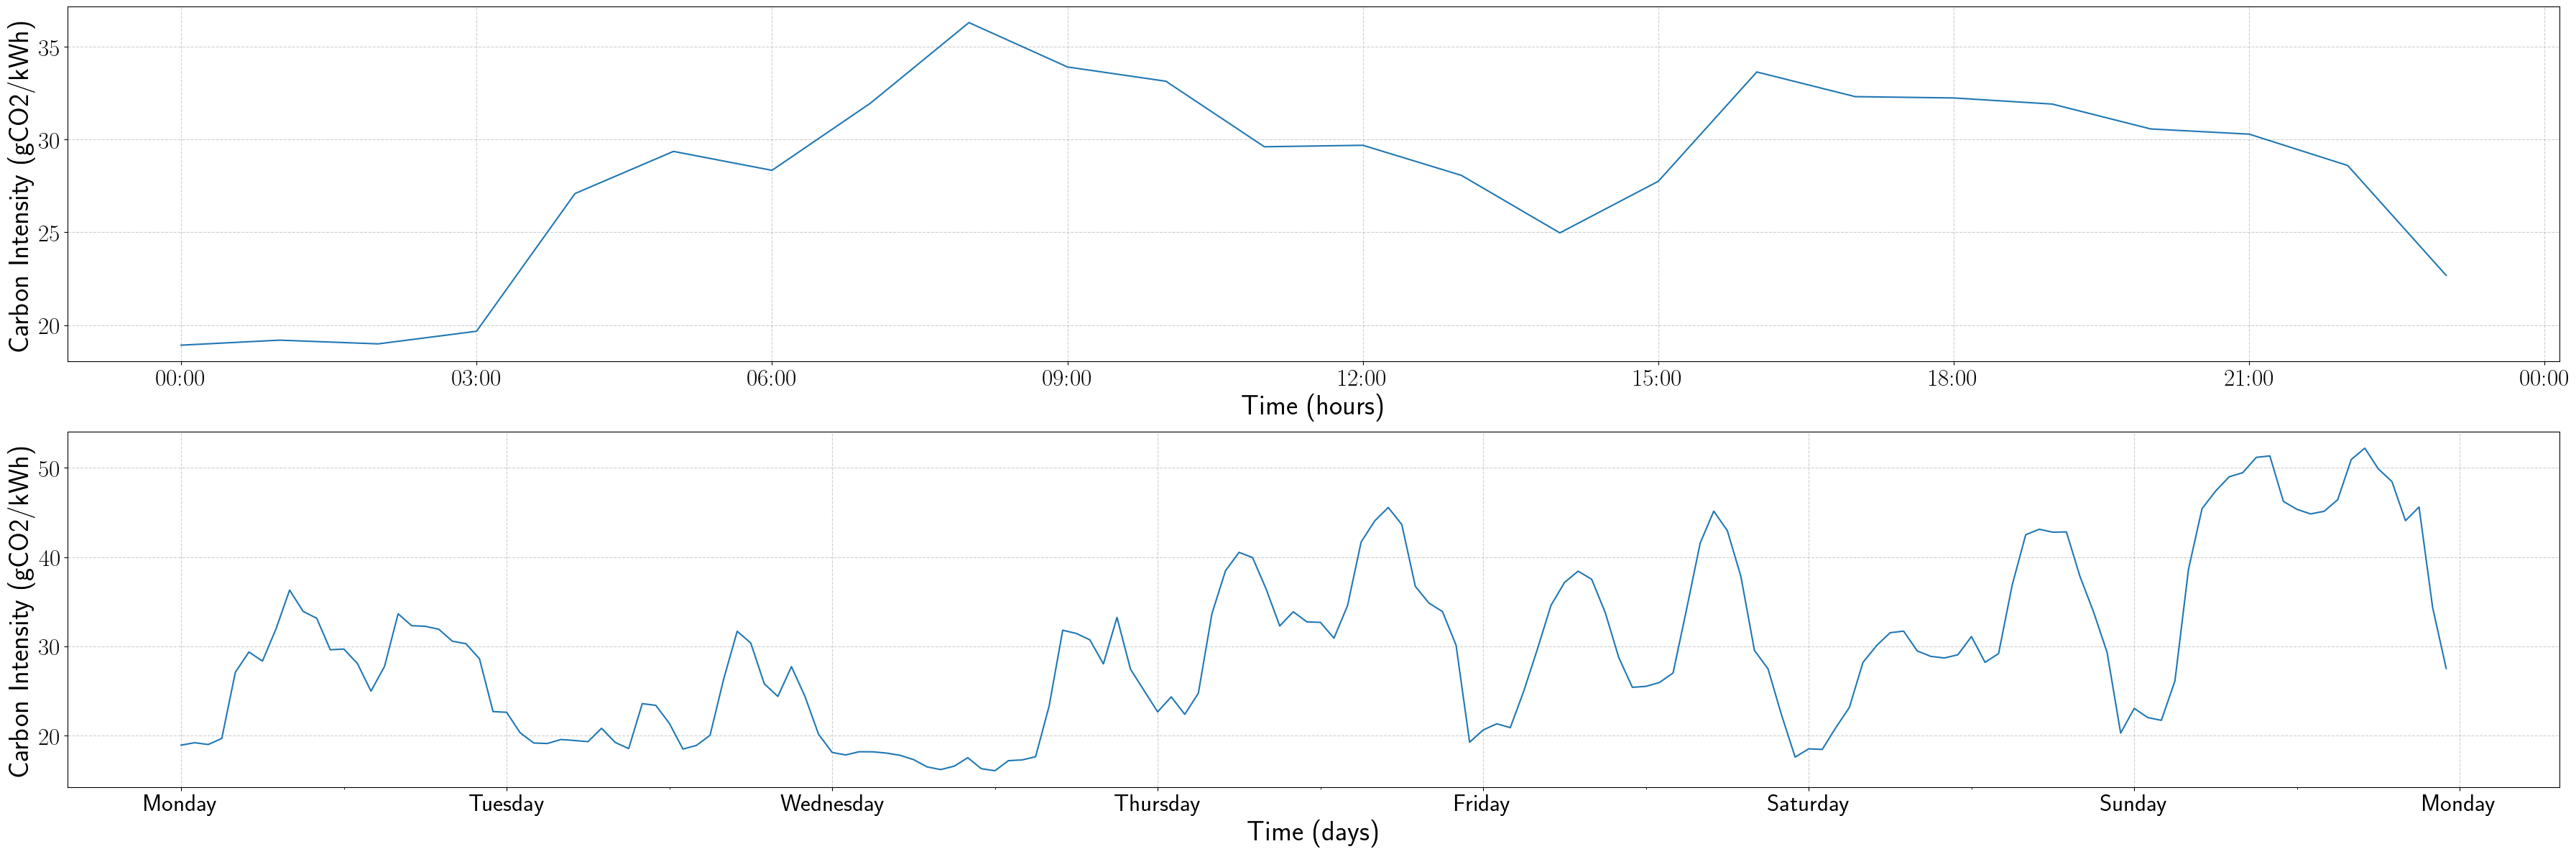

In [5]:
# Enable LaTeX fonts
plt.rcParams['text.usetex'] = True
env.ees.set_episode(33)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(36, 12))

# Daily carbon intensity
axs[0].plot(env.ees.episode.index[:24], env.ees.episode.values[:24])
#axs[0].set_title(r'\textbf{Carbon Intensity}', fontsize=32)
axs[0].set_xlabel(r'Time (hours)', fontsize=28)
axs[0].set_ylabel(r'Carbon Intensity (gCO2/kWh)', fontsize=28)

# Format the x-axis to show dates in 3-hour steps
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%H:%M')
axs[0].xaxis.set_major_locator(hours)
axs[0].xaxis.set_major_formatter(h_fmt)

# Weekly carbon intensity
axs[1].plot(env.ees.episode.index[:24*7], env.ees.episode.values[:24*7])
#axs[1].set_title(r'\textbf{Weekly Carbon Intensity}', fontsize=16)
axs[1].set_xlabel(r'Time (days)', fontsize=28)
axs[1].set_ylabel(r'Carbon Intensity (gCO2/kWh)', fontsize=28)

# Format the x-axis to show dates at 0:00 and 12:00 each day
days = mdates.DayLocator()
d_fmt = mdates.DateFormatter('%A')  # Display the name of the weekday
axs[1].xaxis.set_major_locator(days)
axs[1].xaxis.set_major_formatter(d_fmt)

# Add an additional tick in between for the weekly plot without a description
hours_minor = mdates.HourLocator(byhour=[12])
axs[1].xaxis.set_minor_locator(hours_minor)

# Add gridlines
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[1].grid(True, linestyle='--', alpha=0.6)

axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)
# Ensure the subplots do not overlap
plt.tight_layout()

# Display the plots
plt.savefig(f"../doc/presentation/carbon_intensity_{33}.png")

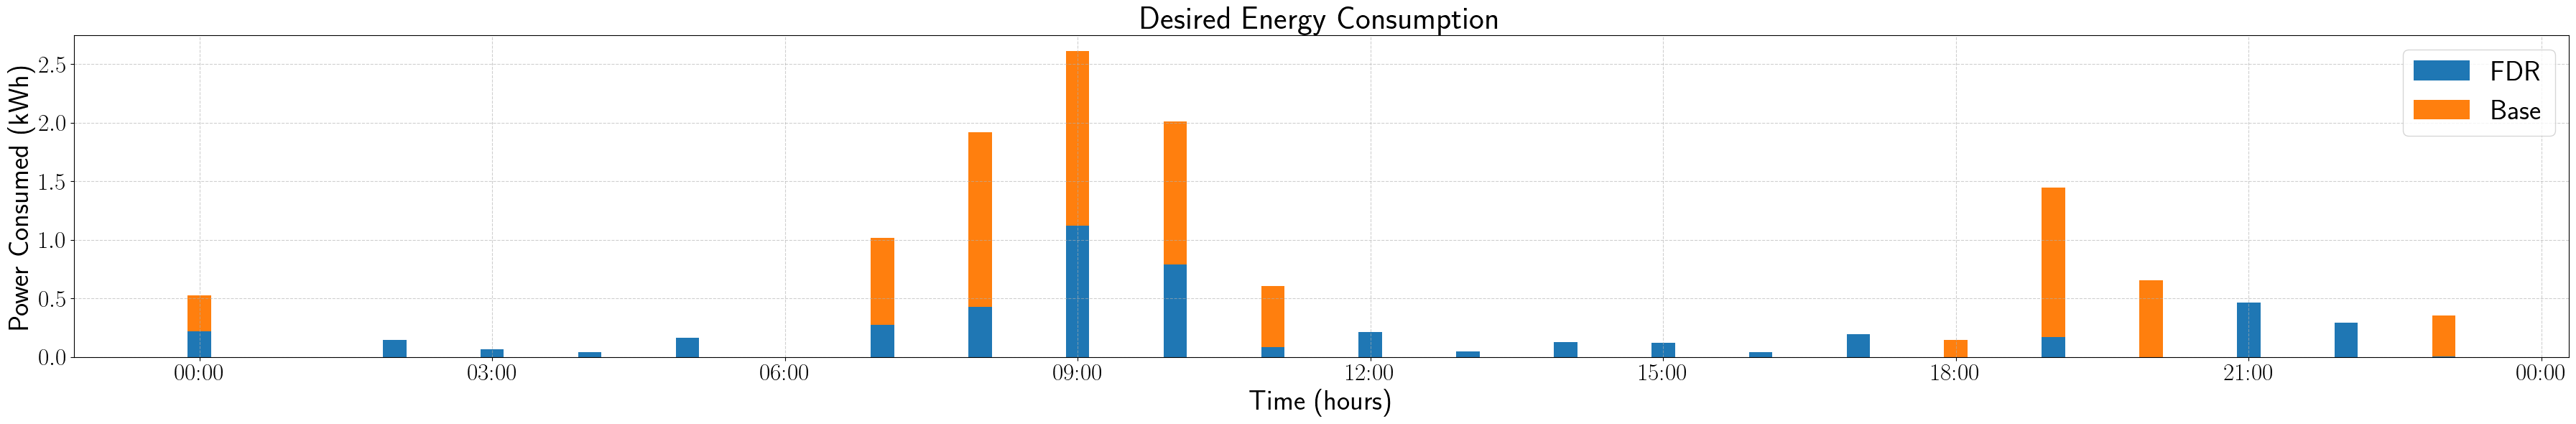

In [17]:
# Set the episode
env.fdr.set_episode(33)

# Create a figure
fig, ax = plt.subplots(figsize=(36, 6))

# Create a bar plot for the first source of consumption
bars1 = ax.bar(env.fdr.episode.index[:24], env.fdr.episode.values[:24].flatten(), width=0.01, label='FDR')  # adjust width as needed

# Create a bar plot for the second source of consumption, stacked on the first one
bars2 = ax.bar(env.hed.episode.index[:24], env.hed.episode.values[:24].flatten(), width=0.01, bottom=env.fdr.episode.values[:24].flatten(), label='Base')  # adjust width as needed

# Add a legend
ax.legend(fontsize=28)

# Set title and labels
ax.set_title('Desired Energy Consumption', fontsize=32)
ax.set_xlabel('Time (hours)', fontsize=28)
ax.set_ylabel('Power Consumed (kWh)', fontsize=28)

# Format the x-axis to show dates in 1-hour steps
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

# Increase tick size
ax.tick_params(axis='both', which='major', labelsize=24)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.savefig(f"../doc/presentation/desired_energy_consumption.png")

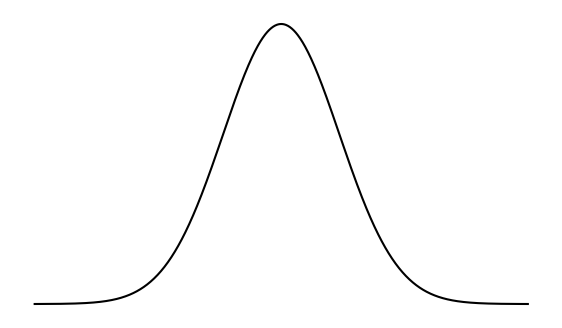

In [22]:
x = np.linspace(-3, 3, 1000)
y = np.exp(-x**2)
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x, y, color='black')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('../doc/presentation/weighting.png', transparent=True)


In [7]:
results = load_results("./logs/hourly")

In [84]:
results_33 = {
    "idle": results["idle_33"],
    "random": results["random_33"],
    "single-threshold": results["single-threshold_33"],
    "ppo": results["ppo_33"],
    "sac": results["sac_33"],
}

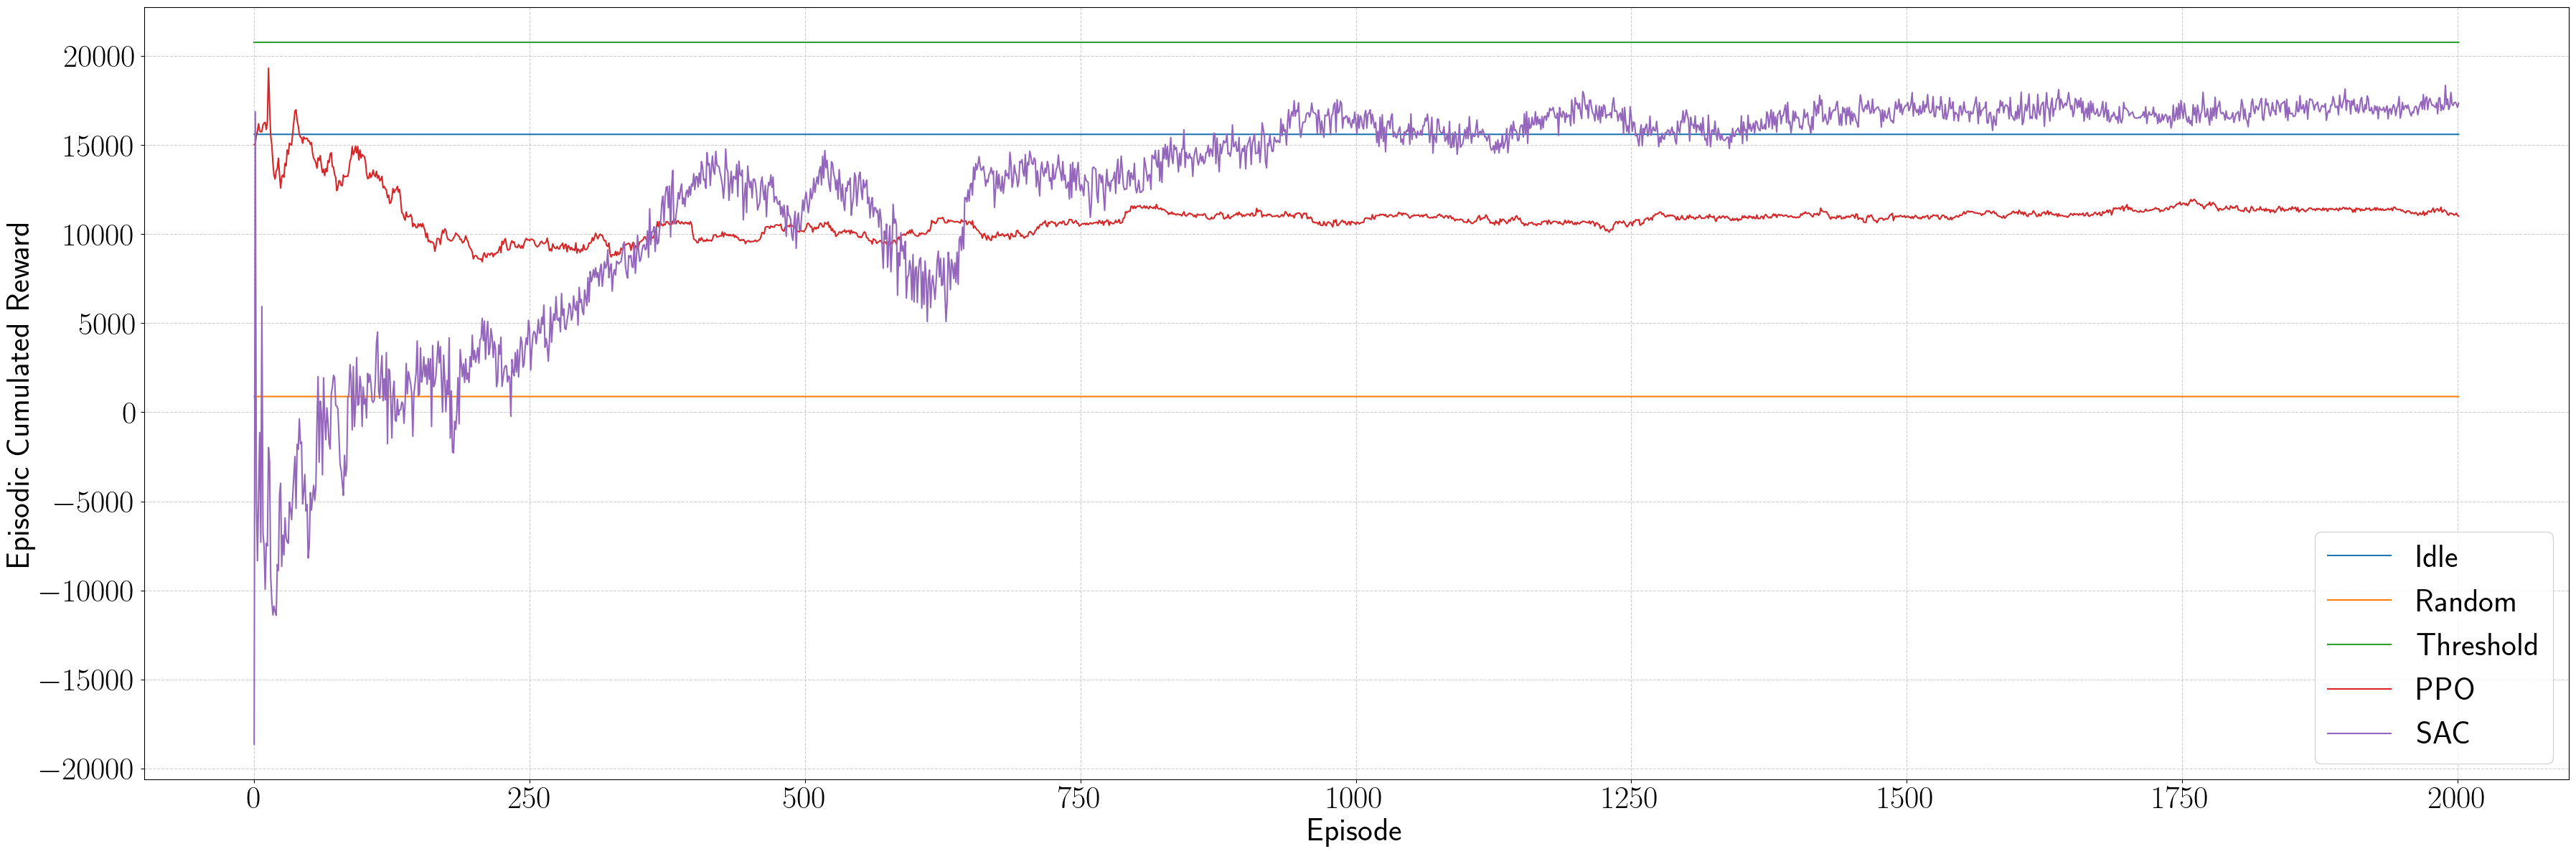

In [86]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_33)))
plt.figure(figsize=(36,12))
ax = plt.gca()

labels = ["Idle", "Random","Threshold", "PPO", "SAC"]

for i, run in enumerate(results_33.keys()):
    if labels[i] == "Random":
        data = [np.mean(results_33[run])] * np.max([len(eps) for eps in results_33.values()])
    elif len(results_33[run]) > 1:
        data = np.array(results_33[run])
    else:
        data = results_33[run] * np.max([len(eps) for eps in results_33.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(fontsize=32)
ax.set_ylabel("Episodic Cumulated Reward", fontsize=32)
ax.set_xlabel("Episode", fontsize=32)
#ax.set_ylim([-50000, -15000])
#ax.grid()
ax.tick_params(axis='both', which='major', labelsize=32)

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(f"../doc/presentation/episodic_cumulated_reward_{33}.png")

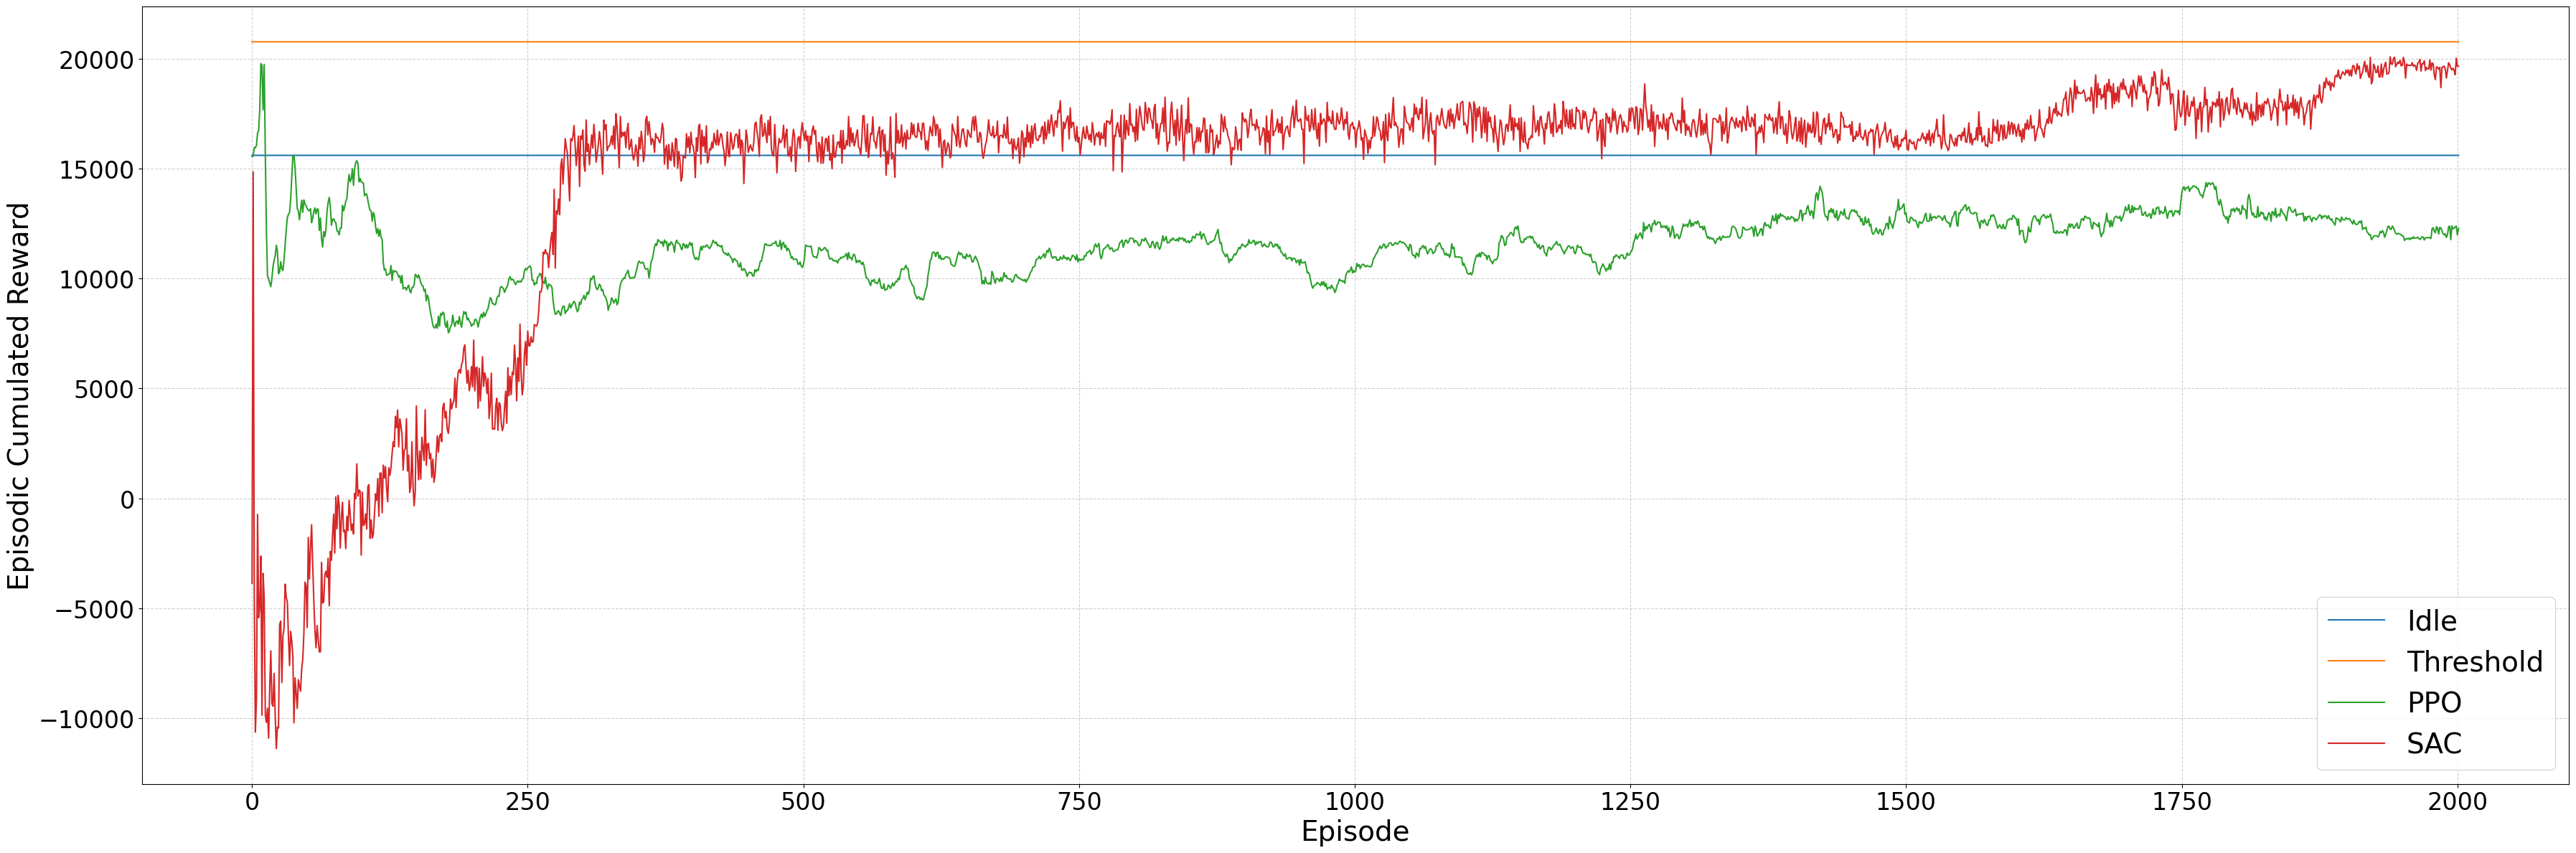

In [9]:
results_stacked_33 = {
    "idle": results["idle_33"],
    "single-threshold": results["single-threshold_33"],
    "ppo": results["ppo_stacked_33"],
    "sac": results["sac_stacked_33"],
}
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_stacked_33)))
plt.figure(figsize=(36,12))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_stacked_33.keys()):
    if len(results_stacked_33[run]) > 1:
        data = np.array(results_stacked_33[run])
    else:
        data = results_stacked_33[run] * np.max([len(eps) for eps in results_stacked_33.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(fontsize=28)
ax.set_ylabel("Episodic Cumulated Reward", fontsize=28)
ax.set_xlabel("Episode", fontsize=28)
#ax.set_ylim([-50000, -15000])
#ax.grid()
ax.tick_params(axis='both', which='major', labelsize=24)

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(f"../doc/presentation/episodic_cumulated_reward_stacked_{33}.png")

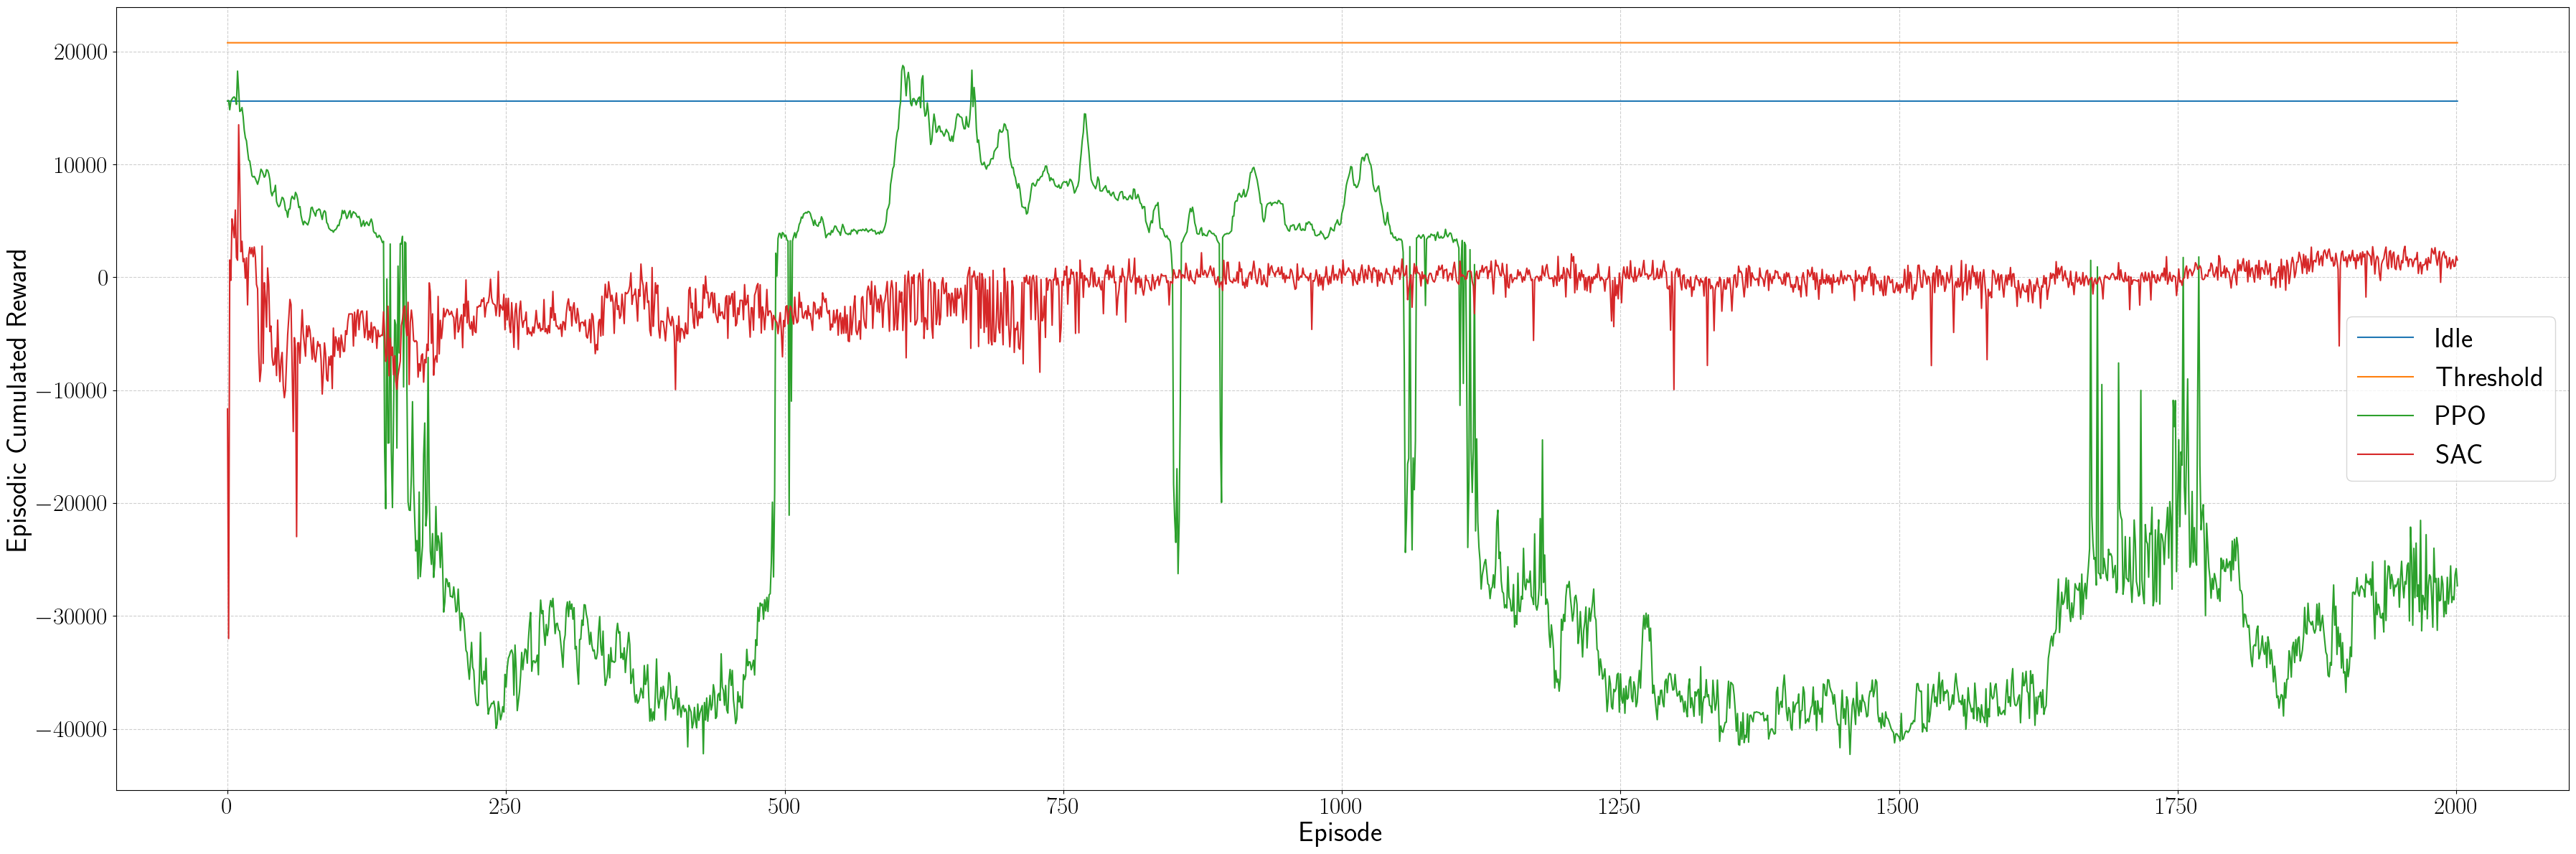

In [10]:
results_terminal_33 = {
    "idle": results["idle_33"],
    "single-threshold": results["single-threshold_33"],
    "ppo": results["ppo_sparse_33"],
    "sac": results["sac_sparse_33"],
}
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_terminal_33)))
plt.figure(figsize=(36,12))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_terminal_33.keys()):
    if len(results_terminal_33[run]) > 1:
        data = np.array(results_terminal_33[run])
    else:
        data = results_terminal_33[run] * np.max([len(eps) for eps in results_terminal_33.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(fontsize=28)
ax.set_ylabel("Episodic Cumulated Reward", fontsize=28)
ax.set_xlabel("Episode", fontsize=28)
#ax.set_ylim([-50000, -15000])
#ax.grid()
ax.tick_params(axis='both', which='major', labelsize=24)

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(f"../doc/presentation/episodic_cumulated_reward_terminal_{33}.png")

In [40]:
results_ess = load_results("./logs/ess")
results_fdr = load_results("./logs/fdr")
results_tcl = load_results("./logs/tcl")

In [51]:
results_scalar_33 = {
    "idle": np.array(results_ess["idle_scalar_fdr33"]) + np.array(results_fdr["idle_scalar_fdr33"]) + np.array(results_tcl["idle_scalar_fdr33"]),
    "single-threshold": np.array(results_ess["single-threshold_scalar_fdr_33"]) + np.array(results_fdr["single-threshold_scalar_fdr_33"]) + np.array(results_tcl["single-threshold_scalar_fdr_33"]),
    "ppo": np.array(results_ess["ppo_scalar_fdr_33"]) + np.array(results_fdr["ppo_scalar_fdr_33"]) + np.array(results_tcl["ppo_scalar_fdr_33"]),
    "sac": np.array(results_ess["sac_scalar_fdr_33"]) + np.array(results_fdr["sac_scalar_fdr_33"]) + np.array(results_tcl["sac_scalar_fdr_33"]),
}

In [53]:
results_scalar_33

{'idle': array([-12451.0414304]),
 'single-threshold': array([-7283.15210032]),
 'ppo': array([-37967.31282911, -37912.37143321, -27029.76835601, ...,
        -14464.94589505, -14472.26039232, -14504.76806739]),
 'sac': array([-37852.99597013, -19367.41891519, -35444.91504953, ...,
        -19062.6280542 , -19261.18731951, -19350.27678667])}

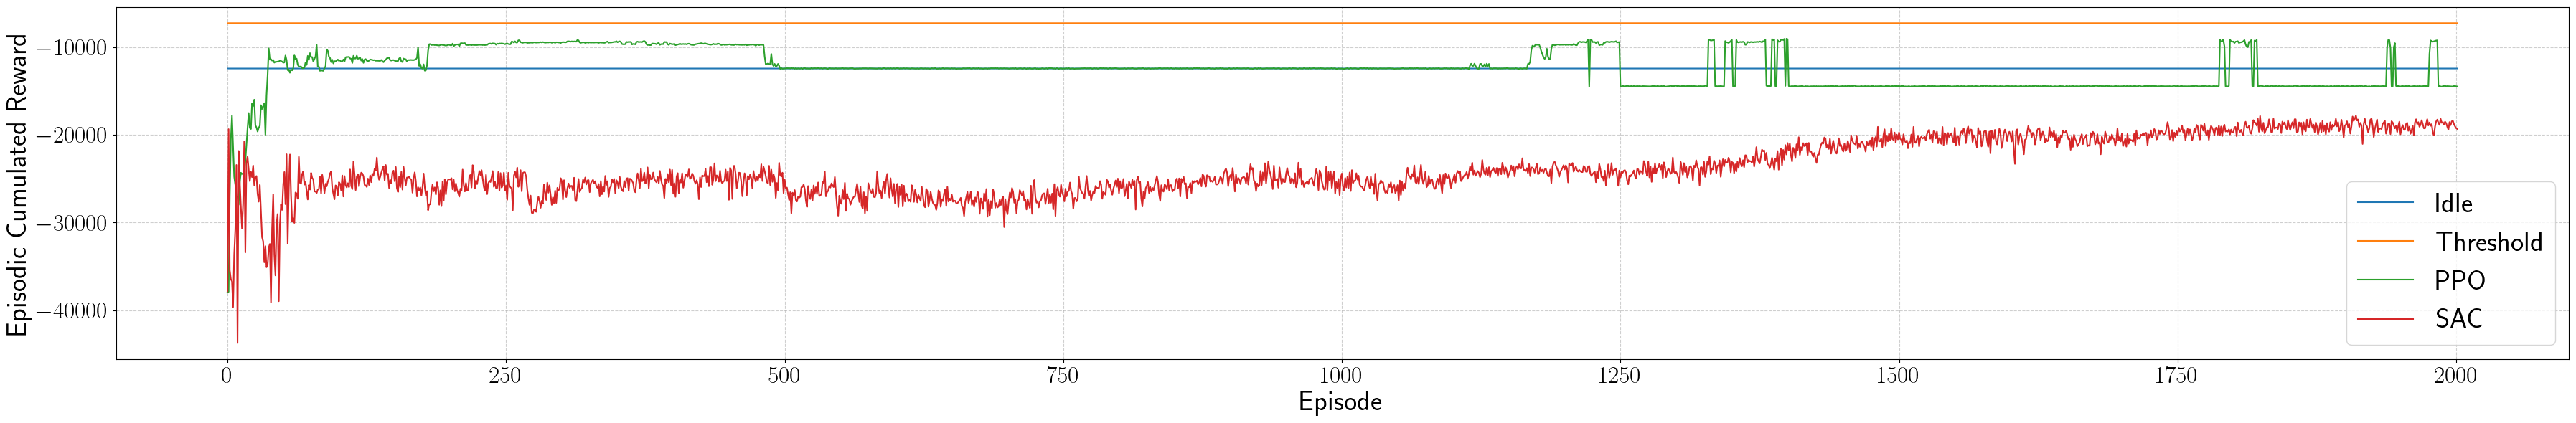

In [64]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_scalar_33)))
plt.figure(figsize=(36,6))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_scalar_33.keys()):
    if len(results_scalar_33[run]) > 1:
        data = results_scalar_33[run]
    else:
        data = list(results_scalar_33[run]) * np.max([len(eps) for eps in results_scalar_33.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(fontsize=28)
ax.set_ylabel("Episodic Cumulated Reward", fontsize=28)
ax.set_xlabel("Episode", fontsize=28)
#ax.set_ylim([-50000, -15000])
#ax.grid()
ax.tick_params(axis='both', which='major', labelsize=24)

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(f"../doc/presentation/episodic_cumulated_reward_scalar_{33}.png")

In [23]:
data_dict = load_data("./logs/hourly")

In [87]:
data_dict_ess = load_data("./logs/ess")
data_dict_fdr = load_data("./logs/fdr")
data_dict_tcl = load_data("./logs/tcl")

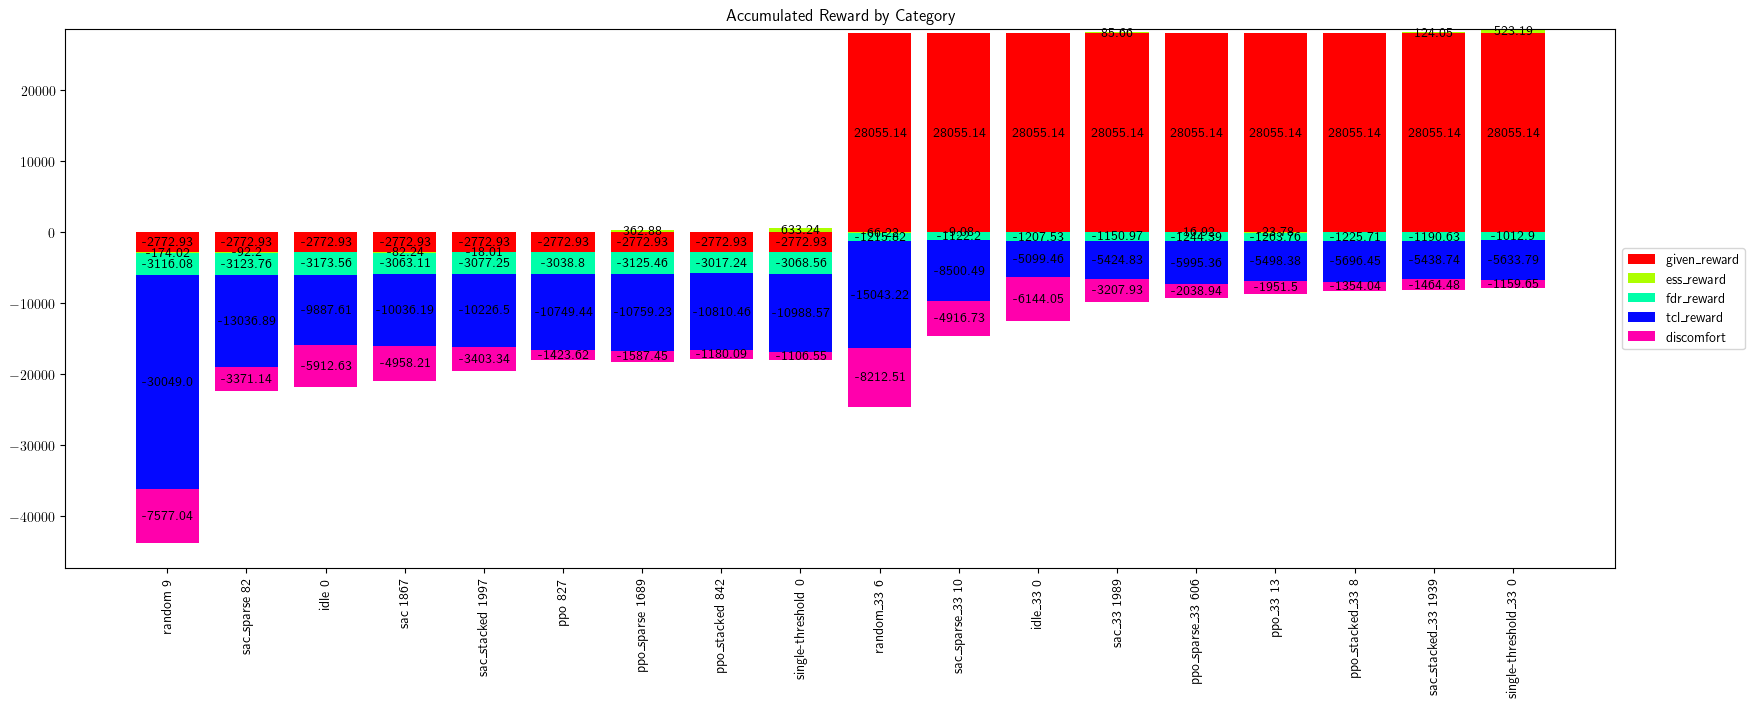

In [88]:
best_rewards_by_category(data_dict)

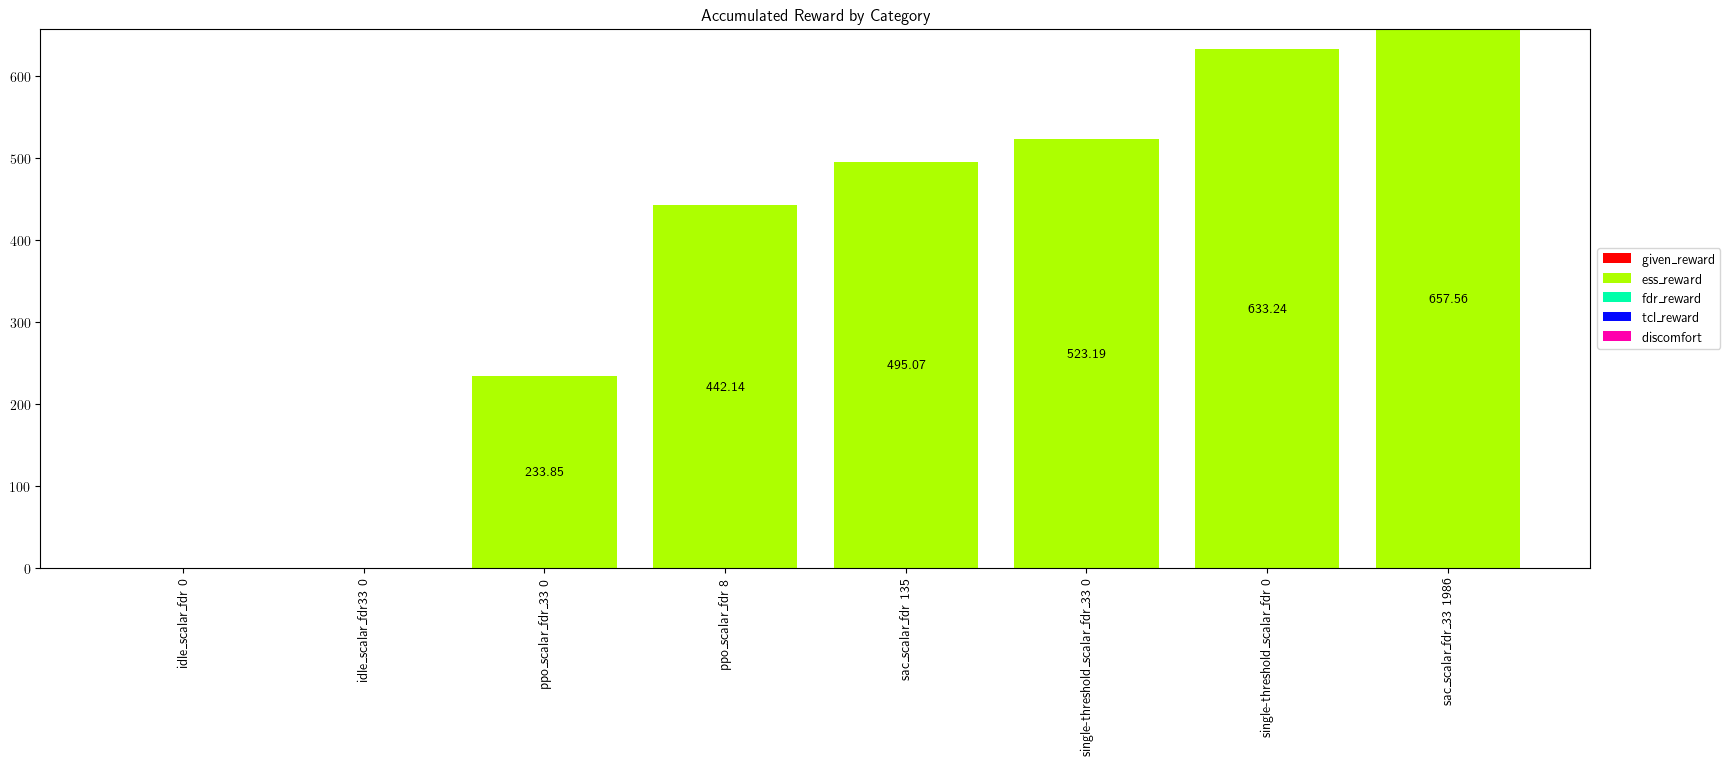

In [46]:
best_rewards_by_category(data_dict_ess)

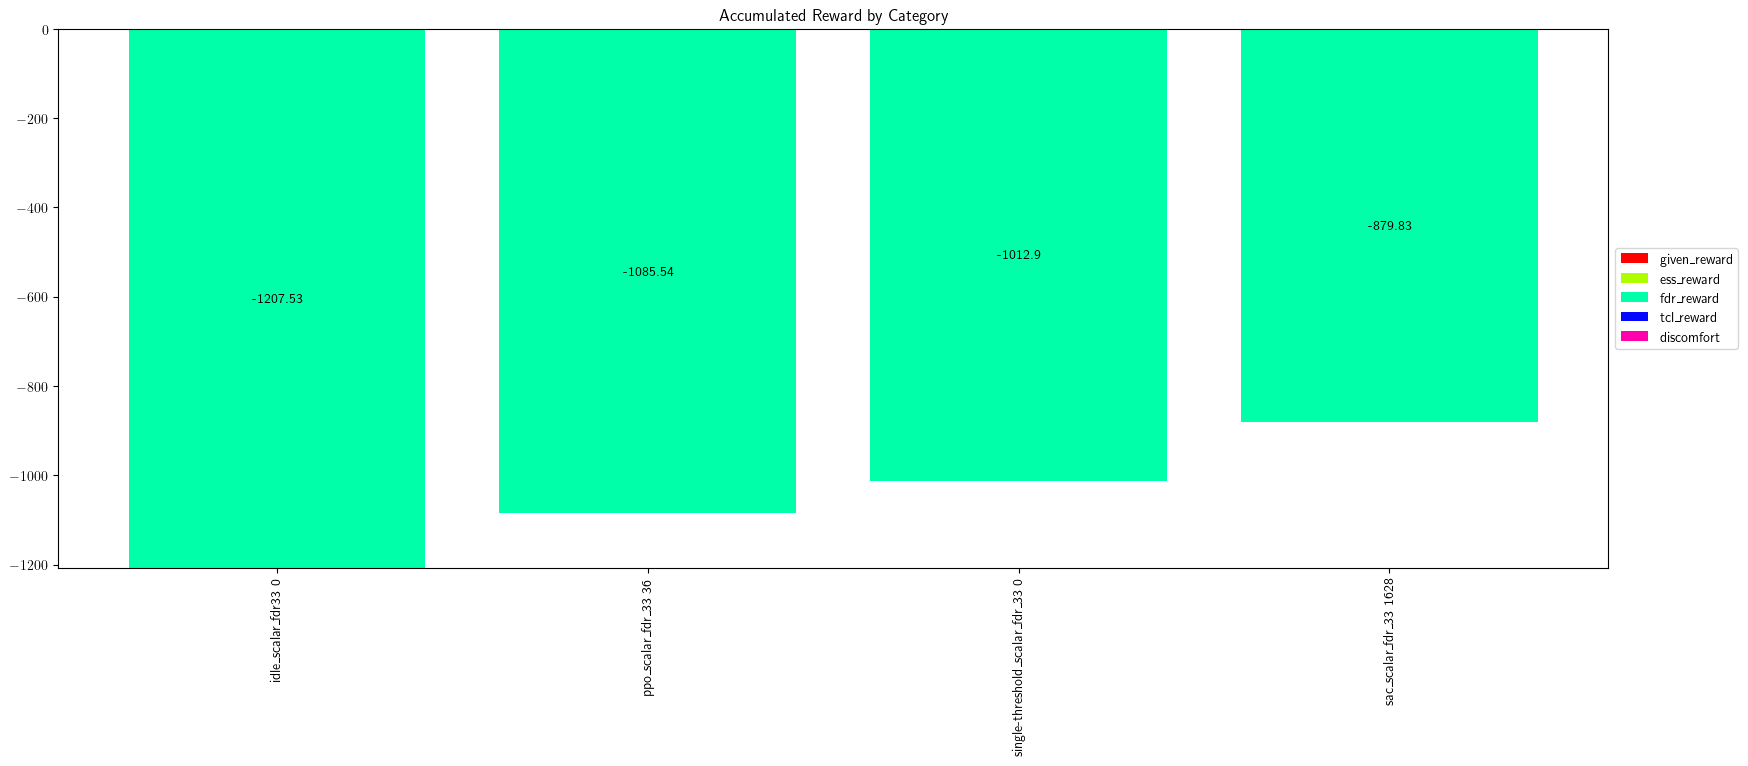

In [47]:
best_rewards_by_category(data_dict_fdr)

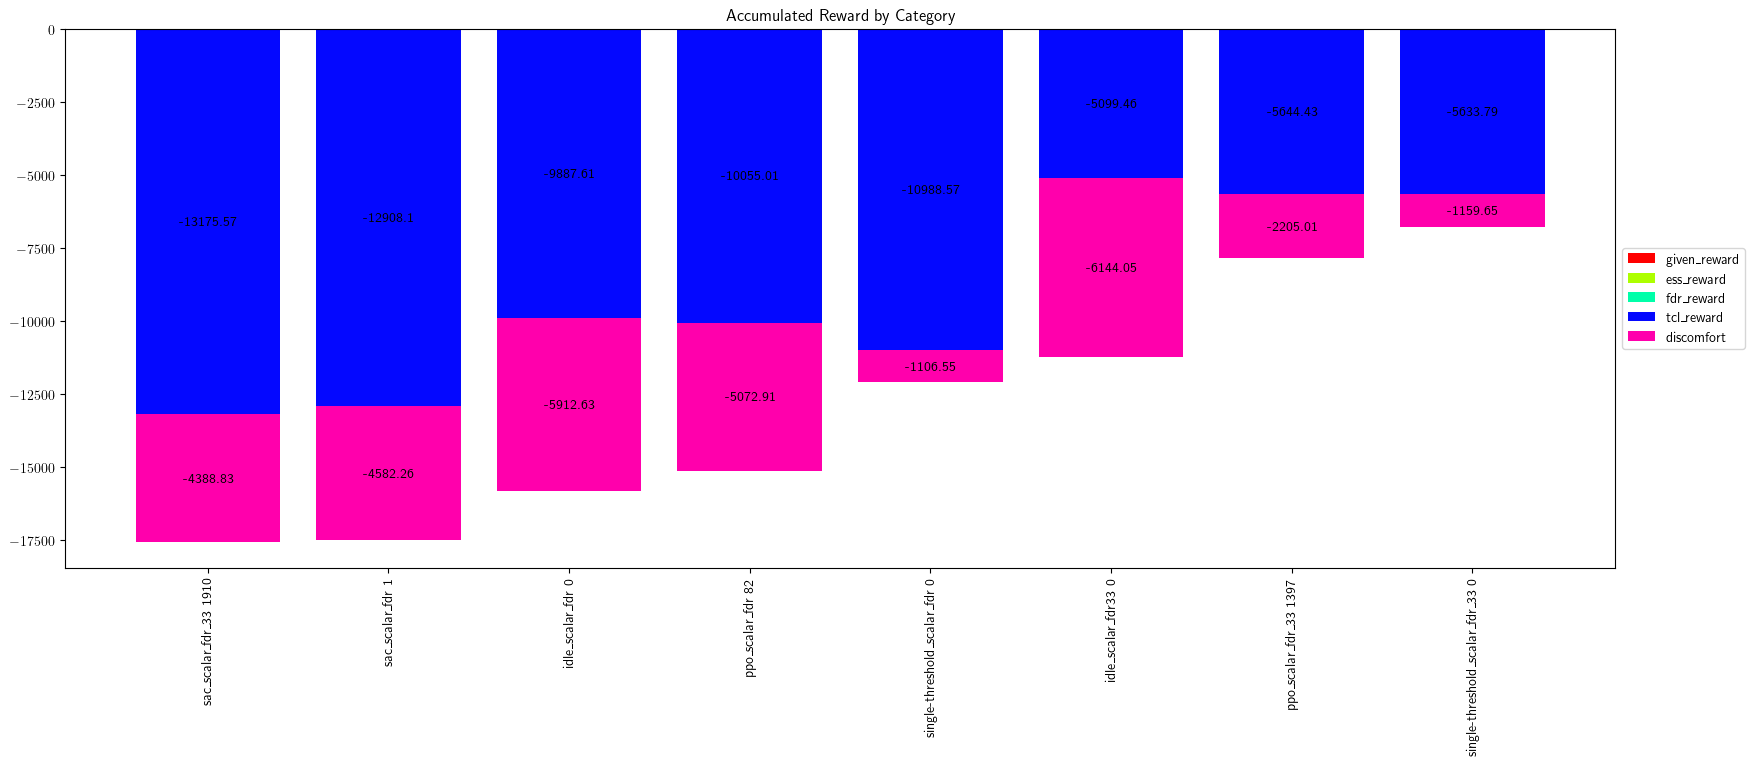

In [48]:
best_rewards_by_category(data_dict_tcl)

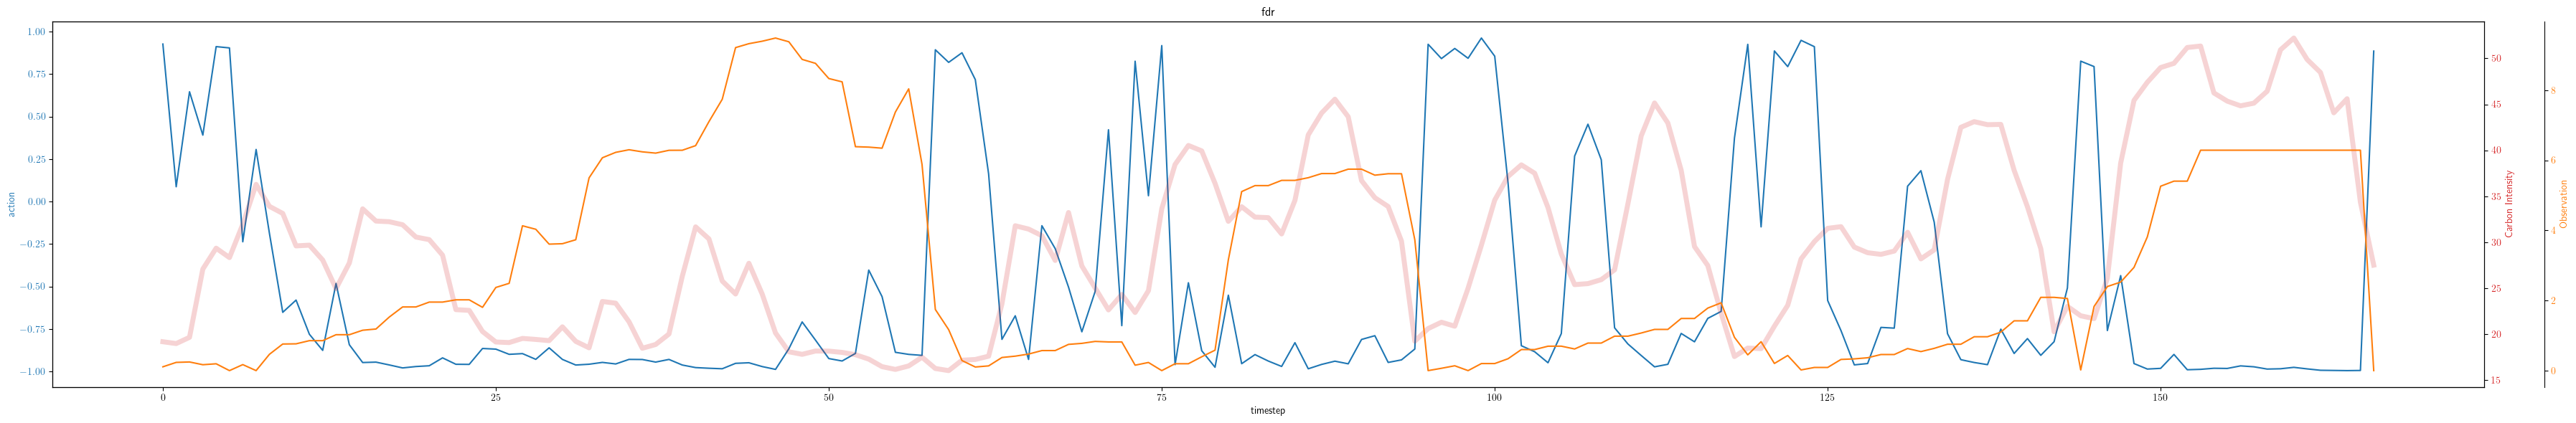

In [49]:
data = data_dict_fdr["sac_scalar_fdr_33"]
episode = 1628

actions = {}
observations = {}
if "ess_reward" in data[episode]["reward_info"].keys():
    actions["ess"] = np.array(data[episode]["action"])[:, 0]
    observations["ess"] = data[episode]["next_observation"]["energy_storage_system_charge"]
if "fdr_reward" in data[episode]["reward_info"].keys():
    actions["fdr"] = np.mean(np.array(data[episode]["action"])[:,
                             1 if "ess_reward" in data[episode]["reward_info"].keys() else 0: -1 if "tcl_reward" in
                                                                                                    data[episode][
                                                                                                        "reward_info"].keys() else None],
                             axis=1)
    observations["fdr"] = data[episode]["next_observation"]["flexible_demand_schedule"]
if "tcl_reward" in data[episode]["reward_info"].keys():
    actions["tcl"] = np.array(data[episode]["action"])[:, -1]
    observations["tcl"] = data[episode]["next_observation"]["tcl_indoor_temperature"]

# Extract the carbon intensity observation
carbon_intensity = np.array(data[episode]["next_observation"]["carbon_intensity"])[..., -1]

# Create a subplot for each action
fig, axs = plt.subplots(len(actions), 1, figsize=(36,6))

for i, (action, action_data) in enumerate(actions.items()):
    ax1 = axs[i] if len(actions) > 1 else axs
    ax1.set_xlabel('timestep')
    ax1.set_ylabel('action', color='tab:blue')
    ax1.plot(action_data, color='tab:blue', label=action)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(action)

    ax2 = ax1.twinx()
    ax2.set_ylabel('Carbon Intensity', color='tab:red')
    ax2.plot(carbon_intensity, color='tab:red', label="Carbon Intensity", linewidth=5, alpha=0.2)
    ax2.tick_params(axis='y', labelcolor='tab:red')

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))  # Move the third axis to the right
    ax3.set_ylabel('Observation', color='tab:orange')
    ax3.plot(observations[action], color='tab:orange', label="Observation")
    ax3.tick_params(axis='y', labelcolor='tab:orange')

plt.tight_layout()
plt.savefig(f"../doc/presentation/sac_scalar_fdr_fdr.png")

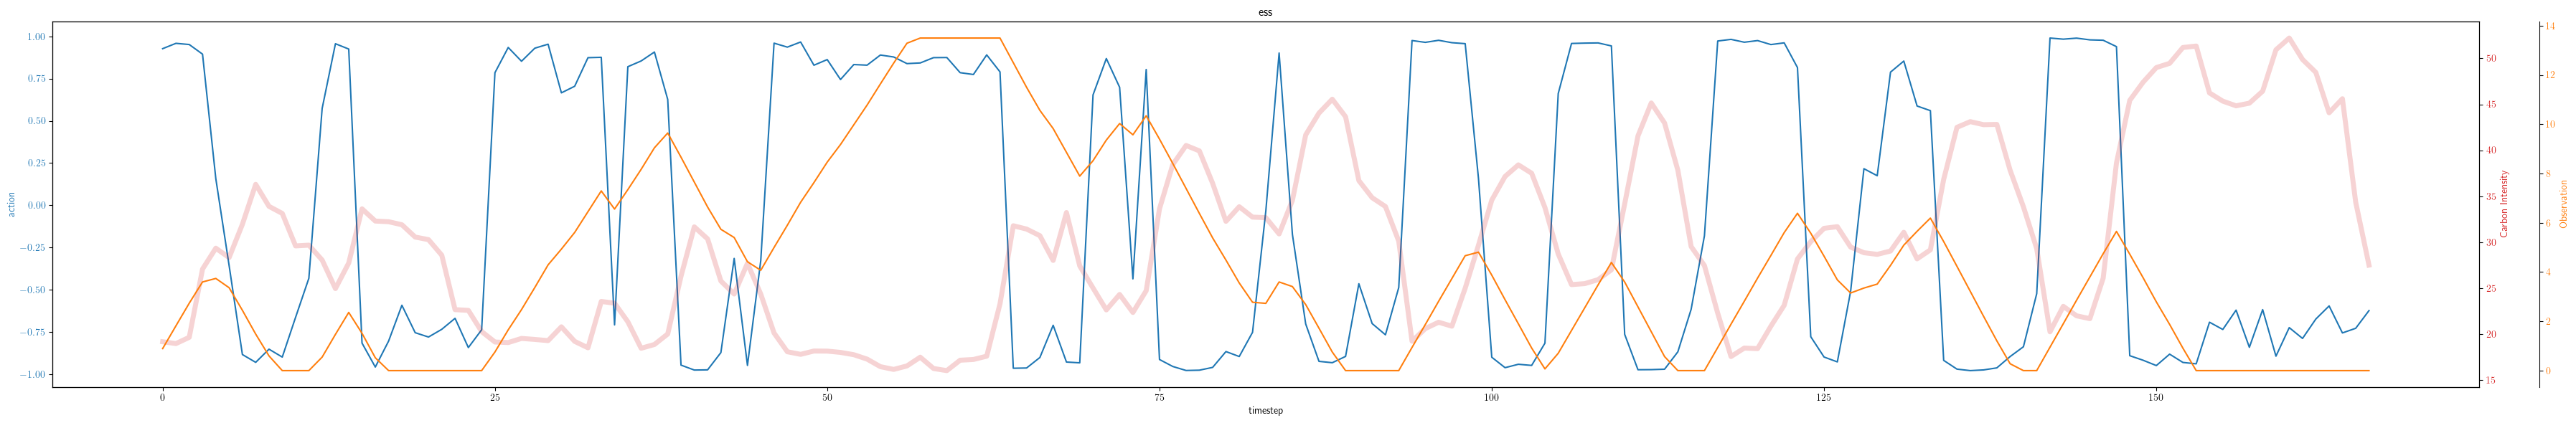

In [50]:
data = data_dict_ess["sac_scalar_fdr_33"]
episode = 1980

actions = {}
observations = {}
if "ess_reward" in data[episode]["reward_info"].keys():
    actions["ess"] = np.array(data[episode]["action"])[:, 0]
    observations["ess"] = data[episode]["next_observation"]["energy_storage_system_charge"]
if "fdr_reward" in data[episode]["reward_info"].keys():
    actions["fdr"] = np.mean(np.array(data[episode]["action"])[:,
                             1 if "ess_reward" in data[episode]["reward_info"].keys() else 0: -1 if "tcl_reward" in
                                                                                                    data[episode][
                                                                                                        "reward_info"].keys() else None],
                             axis=1)
    observations["fdr"] = data[episode]["next_observation"]["flexible_demand_schedule"]
if "tcl_reward" in data[episode]["reward_info"].keys():
    actions["tcl"] = np.array(data[episode]["action"])[:, -1]
    observations["tcl"] = data[episode]["next_observation"]["tcl_indoor_temperature"]

# Extract the carbon intensity observation
carbon_intensity = np.array(data[episode]["next_observation"]["carbon_intensity"])[..., -1]

# Create a subplot for each action
fig, axs = plt.subplots(len(actions), 1, figsize=(36,6))

for i, (action, action_data) in enumerate(actions.items()):
    ax1 = axs[i] if len(actions) > 1 else axs
    ax1.set_xlabel('timestep')
    ax1.set_ylabel('action', color='tab:blue')
    ax1.plot(action_data, color='tab:blue', label=action)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(action)

    ax2 = ax1.twinx()
    ax2.set_ylabel('Carbon Intensity', color='tab:red')
    ax2.plot(carbon_intensity, color='tab:red', label="Carbon Intensity", linewidth=5, alpha=0.2)
    ax2.tick_params(axis='y', labelcolor='tab:red')

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))  # Move the third axis to the right
    ax3.set_ylabel('Observation', color='tab:orange')
    ax3.plot(observations[action], color='tab:orange', label="Observation")
    ax3.tick_params(axis='y', labelcolor='tab:orange')

plt.tight_layout()
plt.savefig(f"../doc/presentation/sac_scalar_fdr_ess.png")

In [67]:
data_dict_33 = {
    "idle": data_dict["idle_3"],
    "single-threshold": data_dict["single-threshold_33"],
    "ppo": data_dict["ppo_33"],
    "sac": data_dict["sac_33"],
}

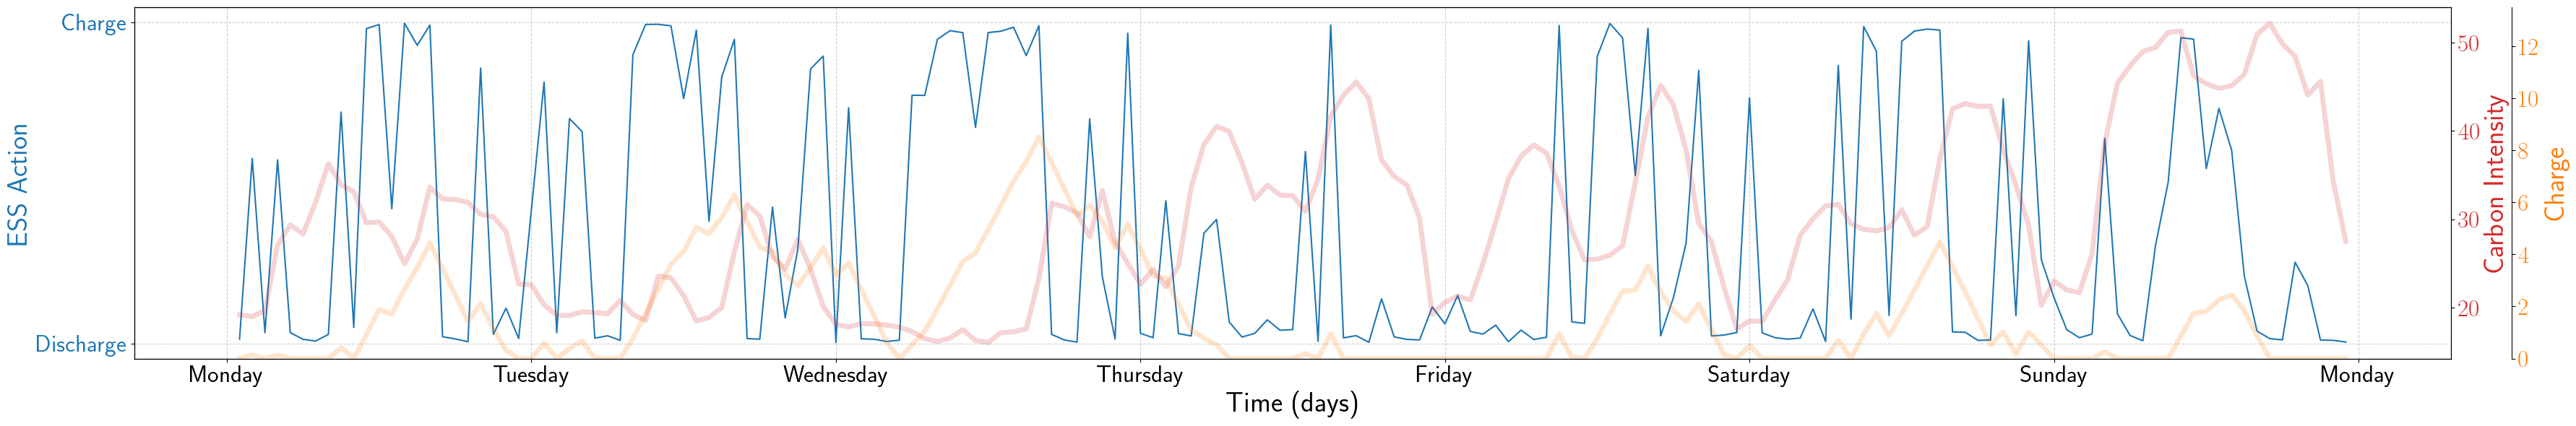

In [69]:
data = data_dict_33["sac"]
episode = 1989
actions = {}
observations = {}

observations["ess"] = data[episode]["next_observation"]["energy_storage_system_charge"]

# Extract the carbon intensity observation
carbon_intensity = np.array(data[episode]["next_observation"]["carbon_intensity"])[..., -1]

# Create a subplot for each action
plt.figure(figsize=(36,6))
ax = plt.gca()

ax.set_ylabel('ESS Action', color='tab:blue', fontsize=28)
ax.set_xlabel(r'Time (days)', fontsize=28)
days = mdates.DayLocator()
d_fmt = mdates.DateFormatter('%A')  # Display the name of the weekday
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.plot(env.ees.episode.index[1:24*7], np.array(data[episode]["action"])[:, 0], color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.set_yticks([-1, 1])
ax.set_yticklabels(['Discharge', 'Charge'], fontsize=24)


ax2 = ax.twinx()
ax2.set_ylabel('Carbon Intensity', color='tab:red', fontsize=28)
ax2.plot(env.ees.episode.index[1:24*7], carbon_intensity, color='tab:red', linewidth=5, alpha=0.2)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=24)

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third axis to the right
ax3.set_ylabel('Charge', color='tab:orange', fontsize=28)
ax3.plot(env.ees.episode.index[1:24*7], observations["ess"], color='tab:orange', linewidth=5, alpha=0.2)
ax3.tick_params(axis='y', labelcolor='tab:orange', labelsize=24 )
ax3.set_ylim([0, 13.5])

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(f"../doc/presentation/ess_action_sac.png")

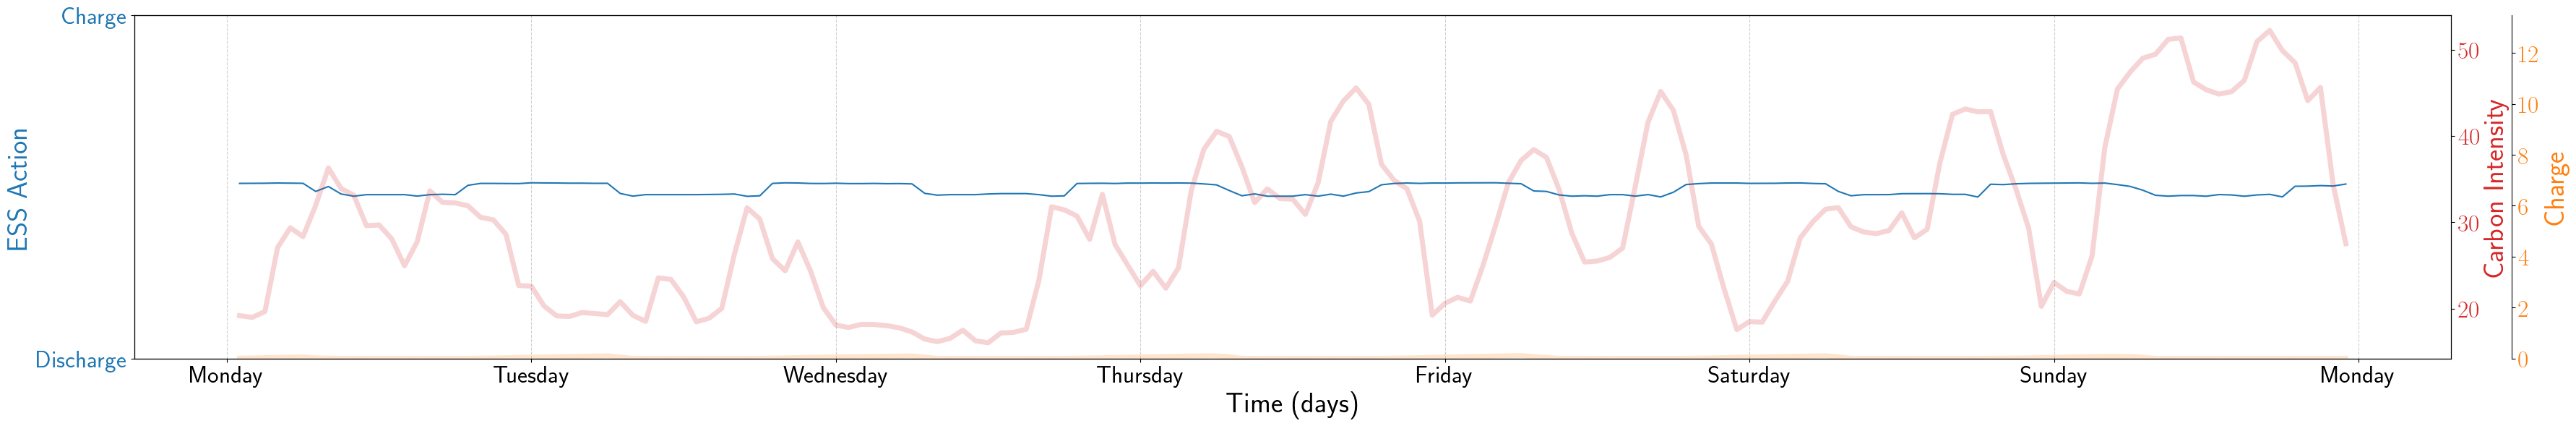

In [70]:
data = data_dict_33["ppo"]
episode = 13
actions = {}
observations = {}

observations["ess"] = data[episode]["next_observation"]["energy_storage_system_charge"]

# Extract the carbon intensity observation
carbon_intensity = np.array(data[episode]["next_observation"]["carbon_intensity"])[..., -1]

# Create a subplot for each action
plt.figure(figsize=(36,6))
ax = plt.gca()

ax.set_ylabel('ESS Action', color='tab:blue', fontsize=28)
ax.set_xlabel(r'Time (days)', fontsize=28)
days = mdates.DayLocator()
d_fmt = mdates.DateFormatter('%A')  # Display the name of the weekday
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.plot(env.ees.episode.index[1:24*7], np.array(data[episode]["action"])[:, 0], color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.set_yticks([-1, 1])
ax.set_yticklabels(['Discharge', 'Charge'], fontsize=24)


ax2 = ax.twinx()
ax2.set_ylabel('Carbon Intensity', color='tab:red', fontsize=28)
ax2.plot(env.ees.episode.index[1:24*7], carbon_intensity, color='tab:red', linewidth=5, alpha=0.2)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=24)

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third axis to the right
ax3.set_ylabel('Charge', color='tab:orange', fontsize=28)
ax3.plot(env.ees.episode.index[1:24*7], observations["ess"], color='tab:orange', linewidth=5, alpha=0.2)
ax3.tick_params(axis='y', labelcolor='tab:orange', labelsize=24 )
ax3.set_ylim([0, 13.5])

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(f"../doc/presentation/ess_action_ppo.png")

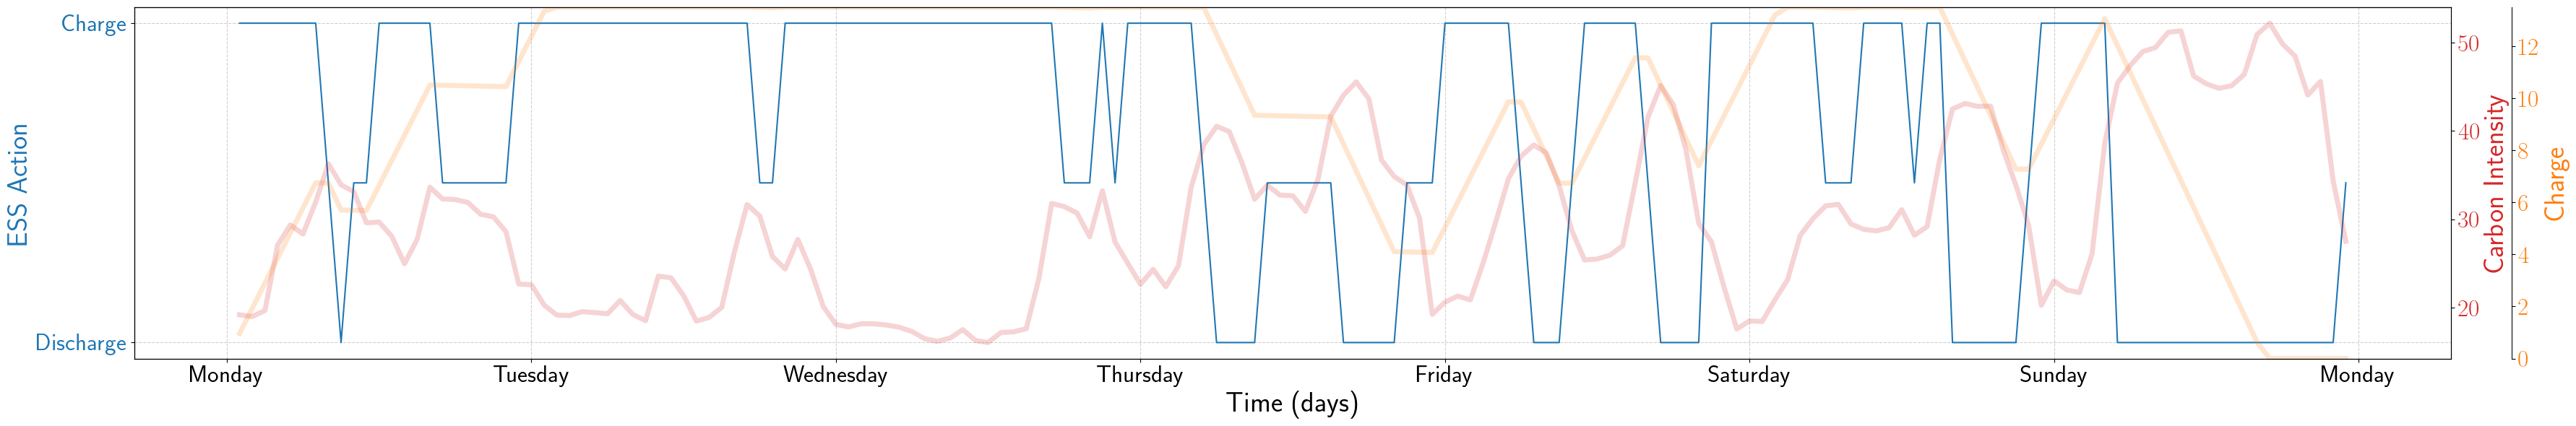

In [71]:
data = data_dict_33["single-threshold"]
episode = 0
actions = {}
observations = {}

observations["ess"] = data[episode]["next_observation"]["energy_storage_system_charge"]

# Extract the carbon intensity observation
carbon_intensity = np.array(data[episode]["next_observation"]["carbon_intensity"])[..., -1]

# Create a subplot for each action
plt.figure(figsize=(36,6))
ax = plt.gca()

ax.set_ylabel('ESS Action', color='tab:blue', fontsize=28)
ax.set_xlabel(r'Time (days)', fontsize=28)
days = mdates.DayLocator()
d_fmt = mdates.DateFormatter('%A')  # Display the name of the weekday
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.plot(env.ees.episode.index[1:24*7], np.array(data[episode]["action"])[:, 0], color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.set_yticks([-1, 1])
ax.set_yticklabels(['Discharge', 'Charge'], fontsize=24)


ax2 = ax.twinx()
ax2.set_ylabel('Carbon Intensity', color='tab:red', fontsize=28)
ax2.plot(env.ees.episode.index[1:24*7], carbon_intensity, color='tab:red', linewidth=5, alpha=0.2)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=24)

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third axis to the right
ax3.set_ylabel('Charge', color='tab:orange', fontsize=28)
ax3.plot(env.ees.episode.index[1:24*7], observations["ess"], color='tab:orange', linewidth=5, alpha=0.2)
ax3.tick_params(axis='y', labelcolor='tab:orange', labelsize=24 )
ax3.set_ylim([0, 13.5])

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(f"../doc/presentation/ess_action_single_threshold.png")

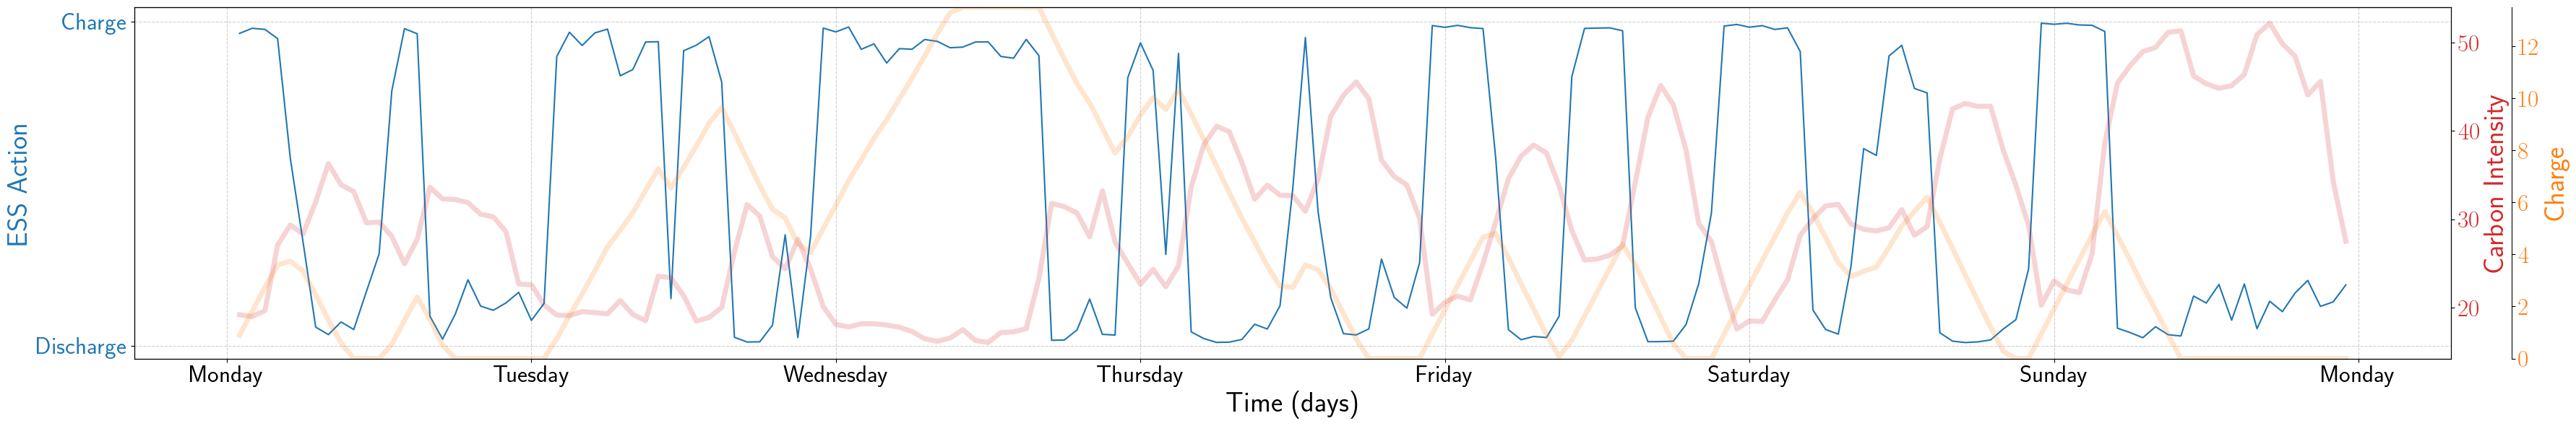

In [18]:
data = data_dict_ess["sac_scalar_fdr_33"]
episode = 1980
actions = {}
observations = {}

observations["ess"] = data[episode]["next_observation"]["energy_storage_system_charge"]

# Extract the carbon intensity observation
carbon_intensity = np.array(data[episode]["next_observation"]["carbon_intensity"])[..., -1]

# Create a subplot for each action
plt.figure(figsize=(36,6))
ax = plt.gca()

ax.set_ylabel('ESS Action', color='tab:blue', fontsize=28)
ax.set_xlabel(r'Time (days)', fontsize=28)
days = mdates.DayLocator()
d_fmt = mdates.DateFormatter('%A')  # Display the name of the weekday
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.plot(env.ees.episode.index[1:24*7], np.array(data[episode]["action"])[:, 0], color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.set_yticks([-1, 1])
ax.set_yticklabels(['Discharge', 'Charge'], fontsize=24)


ax2 = ax.twinx()
ax2.set_ylabel('Carbon Intensity', color='tab:red', fontsize=28)
ax2.plot(env.ees.episode.index[1:24*7], carbon_intensity, color='tab:red', linewidth=5, alpha=0.2)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=24)

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third axis to the right
ax3.set_ylabel('Charge', color='tab:orange', fontsize=28)
ax3.plot(env.ees.episode.index[1:24*7], observations["ess"], color='tab:orange', linewidth=5, alpha=0.2)
ax3.tick_params(axis='y', labelcolor='tab:orange', labelsize=24 )
ax3.set_ylim([0, 13.5])

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(f"../doc/presentation/ess_action_sac.png")

# Static Components Figure

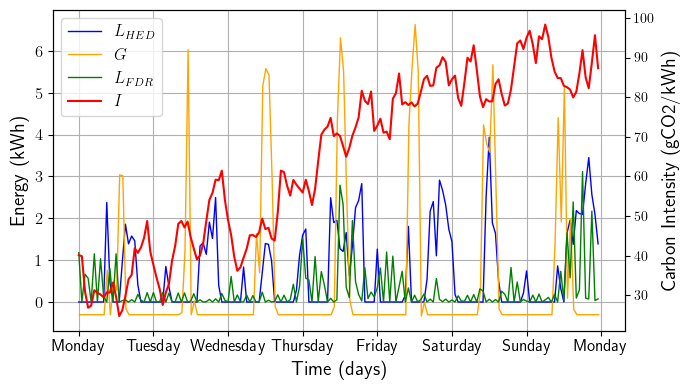

In [22]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(env.hed.episode.index[:24*7], env.hed.episode.values[:24*7], color='blue', label=r"$L_{HED}$", linewidth=1)
ax.plot(env.rsa.episode.index[:24*7], env.rsa.episode.values[:24*7], color='orange', label=r"$G$",
        linewidth=1)
ax.plot(env.fdr.episode.index[:24*7], env.fdr.episode.values[:24*7], color='green', label=r"$L_{FDR}$", linewidth=1)

# Plot the carbon intensity as a line plot
ax2 = ax.twinx()
ax2.plot(env.ees.episode.index[:24*7], env.ees.episode.values[:24*7], color='red', label=r'$I$')
ax2.set_ylabel('Carbon Intensity (gCO2/kWh)', fontsize=14)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=12)


# Set labels for the x and y axes
ax.set_xlabel(r'Time (days)', fontsize=14)
days = mdates.DayLocator()
d_fmt = mdates.DateFormatter('%A')  # Display the name of the weekday
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.set_ylabel('Energy (kWh)', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)

# Add a grid to the plot
ax.grid(True)

# Adjust subplot parameters
plt.tight_layout()

# Show the plot
plt.show()

# Idle reward

In [9]:
import numpy as np
from analysis import load_data
data_dict = load_data("./logs/hourly")["idle"]

data_dict[0]["reward_info"].keys()

dict_keys(['given_reward', 'ess_reward', 'fdr_reward', 'tcl_reward', 'discomfort'])

In [4]:
data_dict[0].keys()

dict_keys(['next_observation', 'action', 'reward', 'reward_info', 'TimeLimit.truncated'])

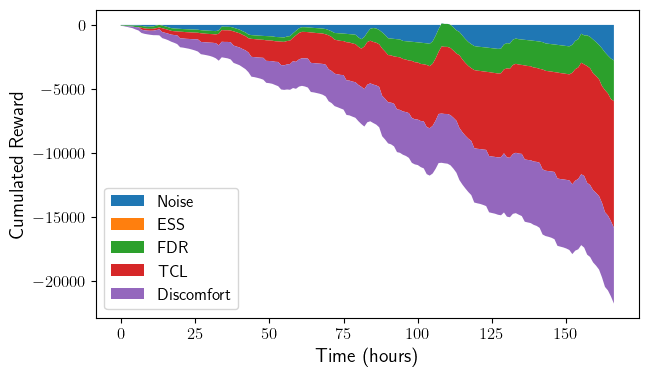

In [13]:
lists = [np.cumsum(val) for val in data_dict[0]["reward_info"].values()]

fig, ax = plt.subplots(figsize=(7, 4))
ax.stackplot(range(len(lists[0])), lists, labels=['Noise', 'ESS', 'FDR', 'TCL', 'Discomfort'])

ax.legend(loc='lower left', fontsize=12)
ax.set_xlabel('Time (hours)', fontsize=14)
ax.set_ylabel('Cumulated Reward', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

# Initial training curve

In [23]:
data_dict = load_data("./logs/hourly")

In [24]:
data_dict_initial = {
    "idle": data_dict["idle"],
    "random":data_dict["random"],
    "single-threshold": data_dict["single-threshold"],
    "ppo": data_dict["ppo"],
    "sac": data_dict["sac"],
}

In [25]:
results = load_results("./logs/hourly")

In [26]:
results_initial = {
    "idle": results["idle"],
    "random": results["random"],
    "single-threshold": results["single-threshold"],
    "ppo": results["ppo"],
    "sac": results["sac"],
}

In [31]:
np.mean(results_initial["random"])

-47552.30282161236

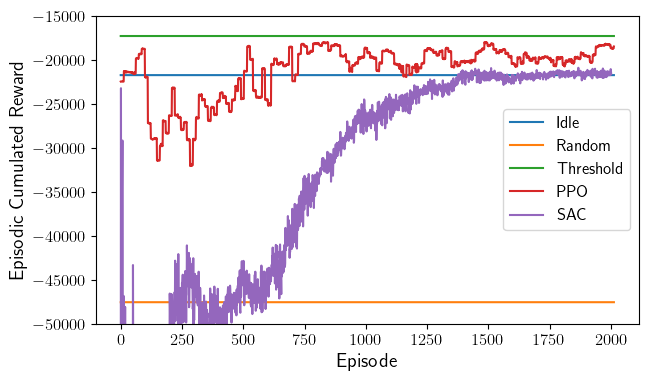

In [40]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_initial)))
plt.figure(figsize=(7,4))
ax = plt.gca()

labels = ["Idle", "Random", "Threshold","PPO", "SAC"]

for i, run in enumerate(results_initial.keys()):
    if labels[i] == "Random":
        data = [np.mean(results_initial[run])] * np.max([len(eps) for eps in results_initial.values()])
    elif len(results_initial[run]) > 1:
        data = np.array(results_initial[run])
    else:
        data = results_initial[run] * np.max([len(eps) for eps in results_initial.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(fontsize=12)
ax.set_ylabel("Episodic Cumulated Reward", fontsize=14)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylim([-50000, -15000])
#ax.grid()

ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [55]:
results_stacked= {
    "idle": results["idle"],
    "random": results["random"],
    "single-threshold": results["single-threshold"],
    "ppo": results["ppo_stacked"],
    "sac": results["sac_stacked"],
}

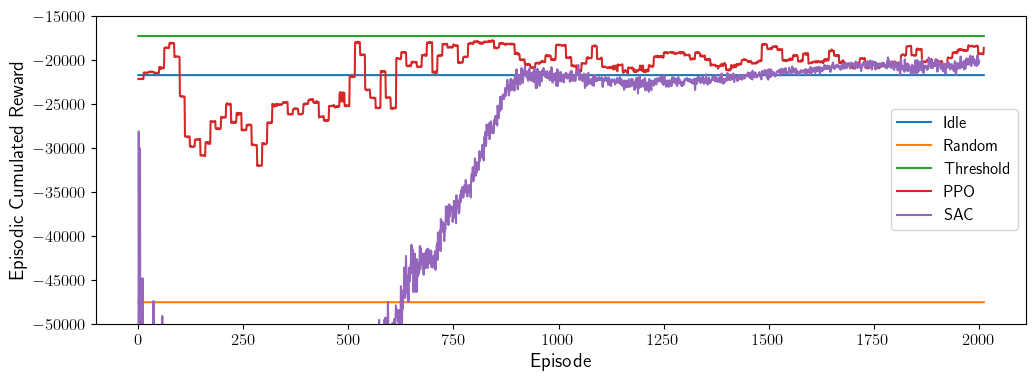

In [64]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_stacked)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Random", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_stacked.keys()):
    if labels[i] == "Random":
        data = [np.mean(results_stacked[run])] * np.max([len(eps) for eps in results_stacked.values()])
    elif len(results_initial[run]) > 1:
        data = np.array(results_stacked[run])
    else:
        data = results_stacked[run] * np.max([len(eps) for eps in results_stacked.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(fontsize=12)
ax.set_ylabel("Episodic Cumulated Reward", fontsize=14)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylim([-50000, -15000])
#ax.grid()

ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [58]:
results_ess = load_results("./logs/ess")
results_fdr = load_results("./logs/fdr")
results_tcl = load_results("./logs/tcl")

In [60]:
results_ess_scalar = {
    "idle": results_ess["idle_scalar_fdr"],
    "random": results_ess["random_scalar_fdr"],
    "single-threshold": results_ess["single-threshold_scalar_fdr"],
    "ppo": results_ess["ppo_scalar_fdr"],
    "sac": results_ess["sac_scalar_fdr"],
}
results_fdr_scalar = {
    "idle": [results_fdr["idle_scalar_fdr"]],
    "random": results_fdr["random_scalar_fdr"],
    "single-threshold": results_fdr["single-threshold_scalar_fdr"],
    "ppo": results_fdr["ppo_scalar_fdr"],
    "sac": results_fdr["sac_scalar_fdr"],
}
results_tcl_scalar = {
    "idle": results_tcl["idle_scalar_fdr"],
    "random": results_tcl["random_scalar_fdr"],
    "single-threshold": results_tcl["single-threshold_scalar_fdr"],
    "ppo": results_tcl["ppo_scalar_fdr"],
    "sac": results_tcl["sac_scalar_fdr"],
}

KeyError: 'idle_scalar_fdr'

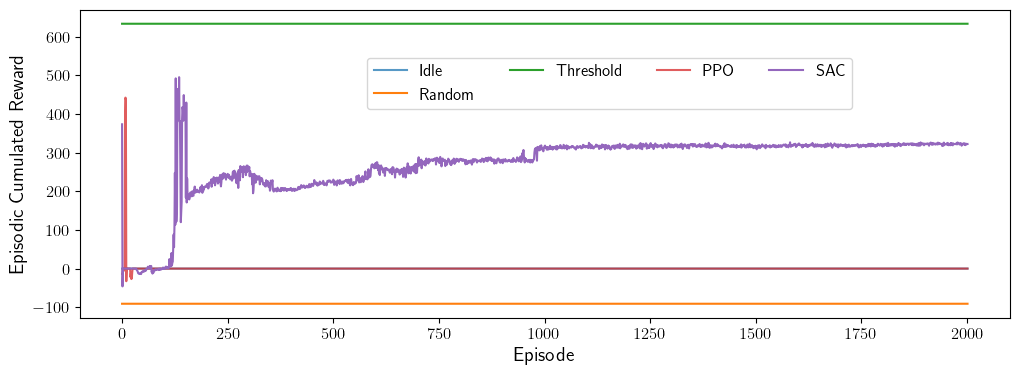

In [76]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_ess_scalar)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Random", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_ess_scalar.keys()):
    if labels[i] == "Random":
        data = [np.mean(results_ess_scalar[run])] * np.max([len(eps) for eps in results_ess_scalar.values()])  
    elif len(results_ess_scalar[run]) > 1:
        data = np.array(results_ess_scalar[run])
    else:
        data = results_ess_scalar[run] * np.max([len(eps) for eps in results_ess_scalar.values()])
    if labels[i] == "PPO" or labels[i] == "Idle":
        ax.plot(data, label=labels[i], alpha=0.75)#, color=colors[i])
    else:
        ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(ncol=4, fontsize=12, bbox_to_anchor=(0.3,0.65))
ax.set_ylabel("Episodic Cumulated Reward", fontsize=14)
ax.set_xlabel("Episode", fontsize=14)
#ax.set_ylim([-50000, -15000])
#ax.grid()

ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

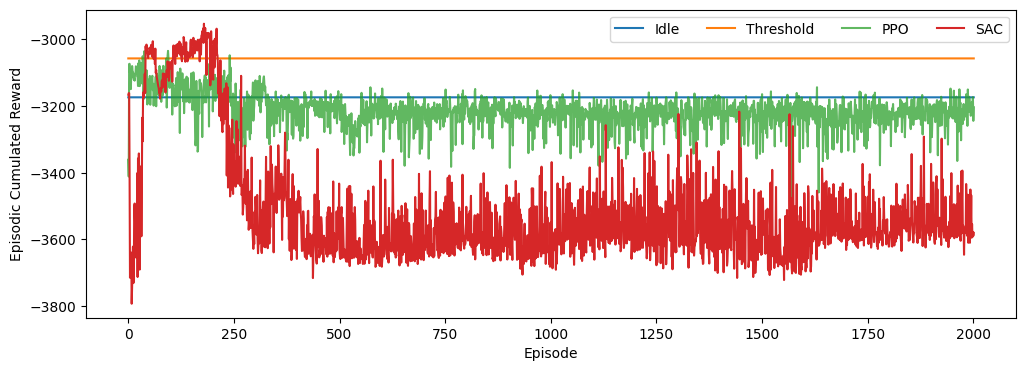

In [32]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_fdr_scalar)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle","Random" ,"Threshold", "PPO", "SAC"]

for i, run in enumerate(results_fdr_scalar.keys()):
    if labels[i] == "Random":
        data = [np.mean(results_fdr_scalar[run])] * np.max([len(eps) for eps in results_ess_scalar.values()])  
    elif len(results_ess_scalar[run]) > 1:
        data = np.array(results_fdr_scalar[run])
    else:
        data = results_fdr_scalar[run] * np.max([len(eps) for eps in results_fdr_scalar.values()])
    if labels[i] == "PPO":
        ax.plot(data, label=labels[i], alpha=0.75)#, color=colors[i])
    else:
        ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(ncol=4)
ax.set_ylabel("Episodic Cumulated Reward")
ax.set_xlabel("Episode")
#ax.set_ylim([-50000, -15000])
#ax.grid()

plt.show()

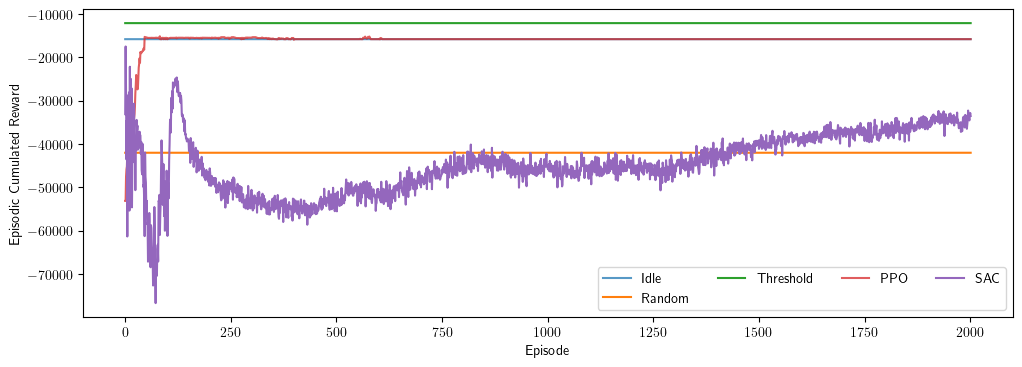

In [78]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_tcl_scalar)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Random" ,"Threshold", "PPO", "SAC"]

for i, run in enumerate(results_tcl_scalar.keys()):
    if labels[i] == "Random":
        data = [np.mean(results_tcl_scalar[run])] * np.max([len(eps) for eps in results_ess_scalar.values()])  
    elif len(results_ess_scalar[run]) > 1:
        data = np.array(results_tcl_scalar[run])
    else:
        data = results_tcl_scalar[run] * np.max([len(eps) for eps in results_tcl_scalar.values()])
    if labels[i] == "PPO" or labels[i] == "Idle":
        ax.plot(data, label=labels[i], alpha=0.75)#, color=colors[i])
    else:
        ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(ncol=4)
ax.set_ylabel("Episodic Cumulated Reward")
ax.set_xlabel("Episode")
#ax.set_ylim([-50000, -15000])
#ax.grid()

plt.show()

In [80]:
results_terminal = {
    "idle": results["idle"],
    "random": results["random"],
    "single-threshold": results["single-threshold"],
    "ppo": results["ppo_sparse"],
    "sac": results["sac_sparse"],
}

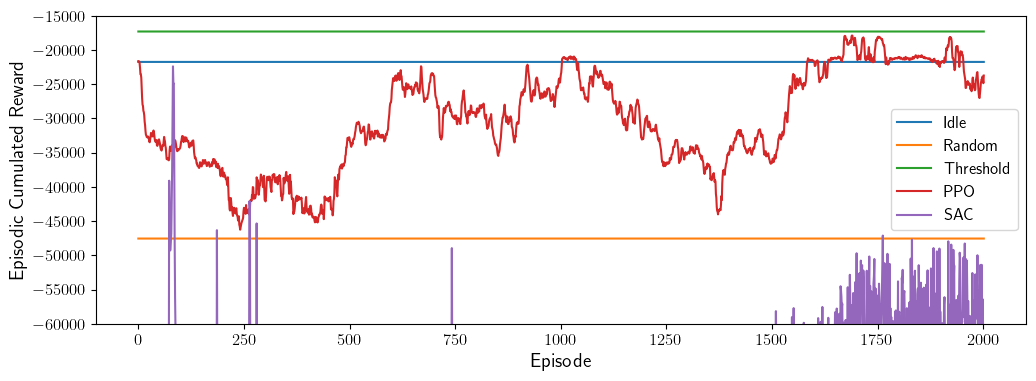

In [83]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_terminal)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Random","Threshold", "PPO", "SAC"]

for i, run in enumerate(results_terminal.keys()):
    if labels[i] == "Random":
        data = [np.mean(results_terminal[run])] * np.max([len(eps) for eps in results_terminal.values()])  
    elif len(results_ess_scalar[run]) > 1:
        data = np.array(results_terminal[run])
    else:
        data = results_terminal[run] * np.max([len(eps) for eps in results_terminal.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(fontsize=12)
ax.set_ylabel("Episodic Cumulated Reward", fontsize=14)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylim([-60000, -15000])
#ax.grid()

ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

# Table

In [52]:
print(np.mean([np.sum(eps["reward_info"]["ess_reward"]) for eps in data_dict["random"]]))
print(np.mean([np.sum(eps["reward_info"]["fdr_reward"]) for eps in data_dict["random"]]))
print(np.mean([np.sum(eps["reward_info"]["tcl_reward"]) for eps in data_dict["random"]]))
print(np.mean([np.sum(eps["reward_info"]["discomfort"]) for eps in data_dict["random"]]))
print(np.mean([np.sum(eps["reward"]) for eps in data_dict["random"]]))

-87.56702277207765
-3112.283889058751
-33017.24762819788
-8562.271682888319
-47552.30280345042


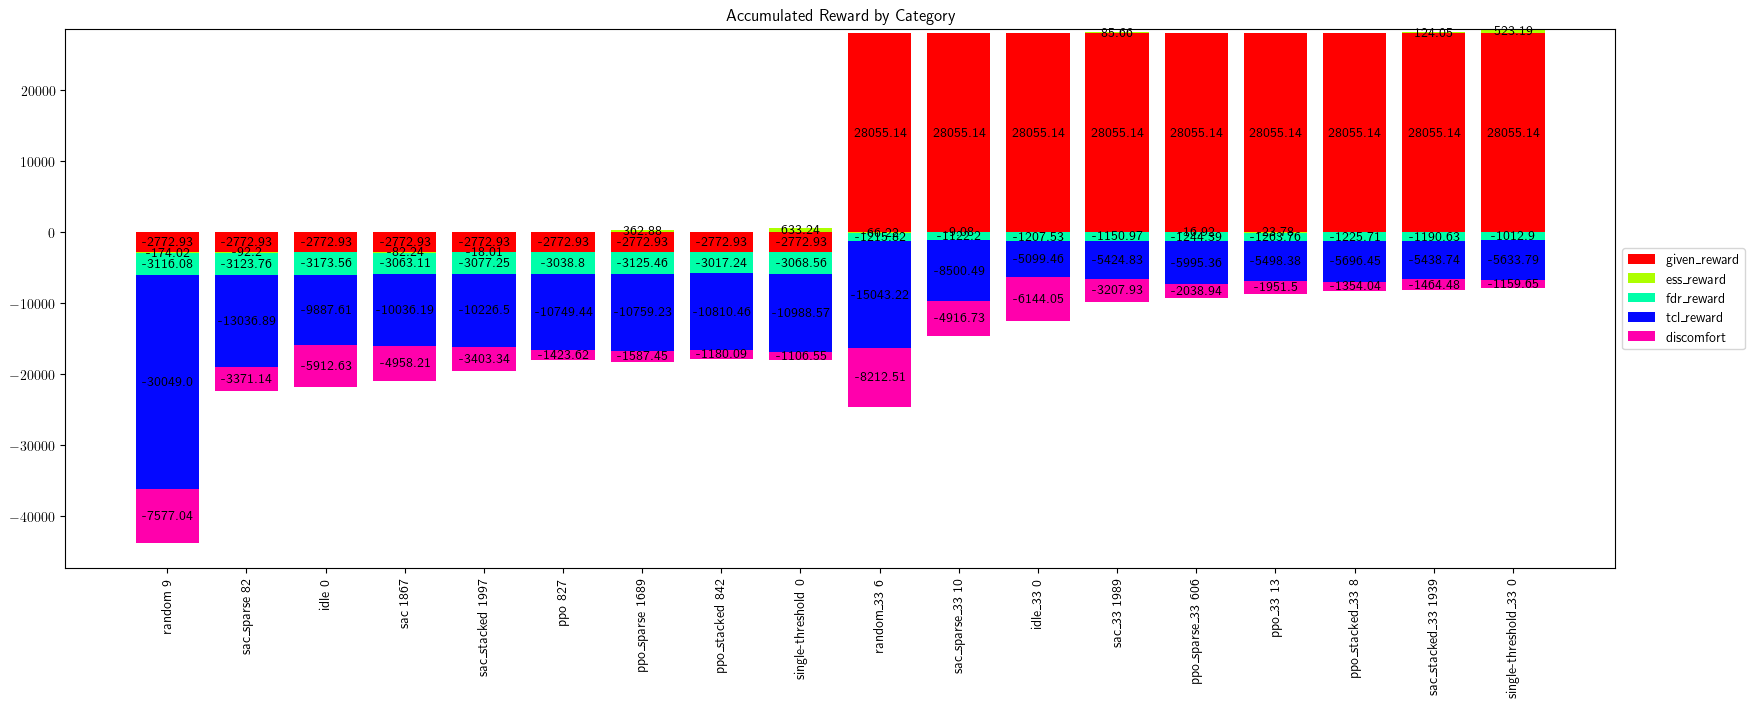

In [41]:
best_rewards_by_category(data_dict)

In [42]:
ess_data = load_data("./logs/ess")
fdr_data = load_data("./logs/fdr")
tcl_data = load_data("./logs/tcl")
hourly_data = load_data("./logs/hourly")

In [54]:
print(np.mean([np.sum(eps["reward_info"]["ess_reward"]) for eps in ess_data["random_scalar_fdr"]]))
print(np.mean([np.sum(eps["reward_info"]["fdr_reward"]) for eps in fdr_data["random_scalar_fdr"]]))
print(np.mean([np.sum(eps["reward_info"]["tcl_reward"]) for eps in tcl_data["random_scalar_fdr"]]))
print(np.mean([np.sum(eps["reward_info"]["discomfort"]) for eps in tcl_data["random_scalar_fdr"]]))

-90.92881871442955
-3112.3328333622394
-32818.00631276869
-9205.60232836656


In [59]:
ess_data = {
    "sac_scalar_fdr": ess_data["sac_scalar_fdr"][1:],
    "ppo_scalar_fdr": ess_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": ess_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": ess_data["single-threshold_scalar_fdr"]
}
fdr_data = {
    "sac_scalar_fdr": fdr_data["sac_scalar_fdr"],
    "ppo_scalar_fdr": fdr_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": fdr_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": fdr_data["single-threshold_scalar_fdr"]
}
tcl_data = {
    "sac_scalar_fdr": tcl_data["sac_scalar_fdr"],
    "ppo_scalar_fdr": tcl_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": tcl_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": tcl_data["single-threshold_scalar_fdr"]
}
hourly_data = {
    "sac_sparse": hourly_data["sac_sparse"],
    "ppo_sparse": hourly_data["ppo_sparse"],
}

In [63]:
ess_data2 = {
    "sac_scalar_fdr": ess_data["sac_scalar_fdr"][1:],
    "ppo_scalar_fdr": ess_data["ppo_scalar_fdr"][10:],
    "idle_scalar_fdr": ess_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": ess_data["single-threshold_scalar_fdr"]
}
fdr_data = {
    "sac_scalar_fdr": fdr_data["sac_scalar_fdr"],
    "ppo_scalar_fdr": fdr_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": fdr_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": fdr_data["single-threshold_scalar_fdr"]
}
tcl_data = {
    "sac_scalar_fdr": tcl_data["sac_scalar_fdr"],
    "ppo_scalar_fdr": tcl_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": tcl_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": tcl_data["single-threshold_scalar_fdr"]
}
hourly_data = {
    "sac_sparse": hourly_data["sac_sparse"],
    "ppo_sparse": hourly_data["ppo_sparse"],
}

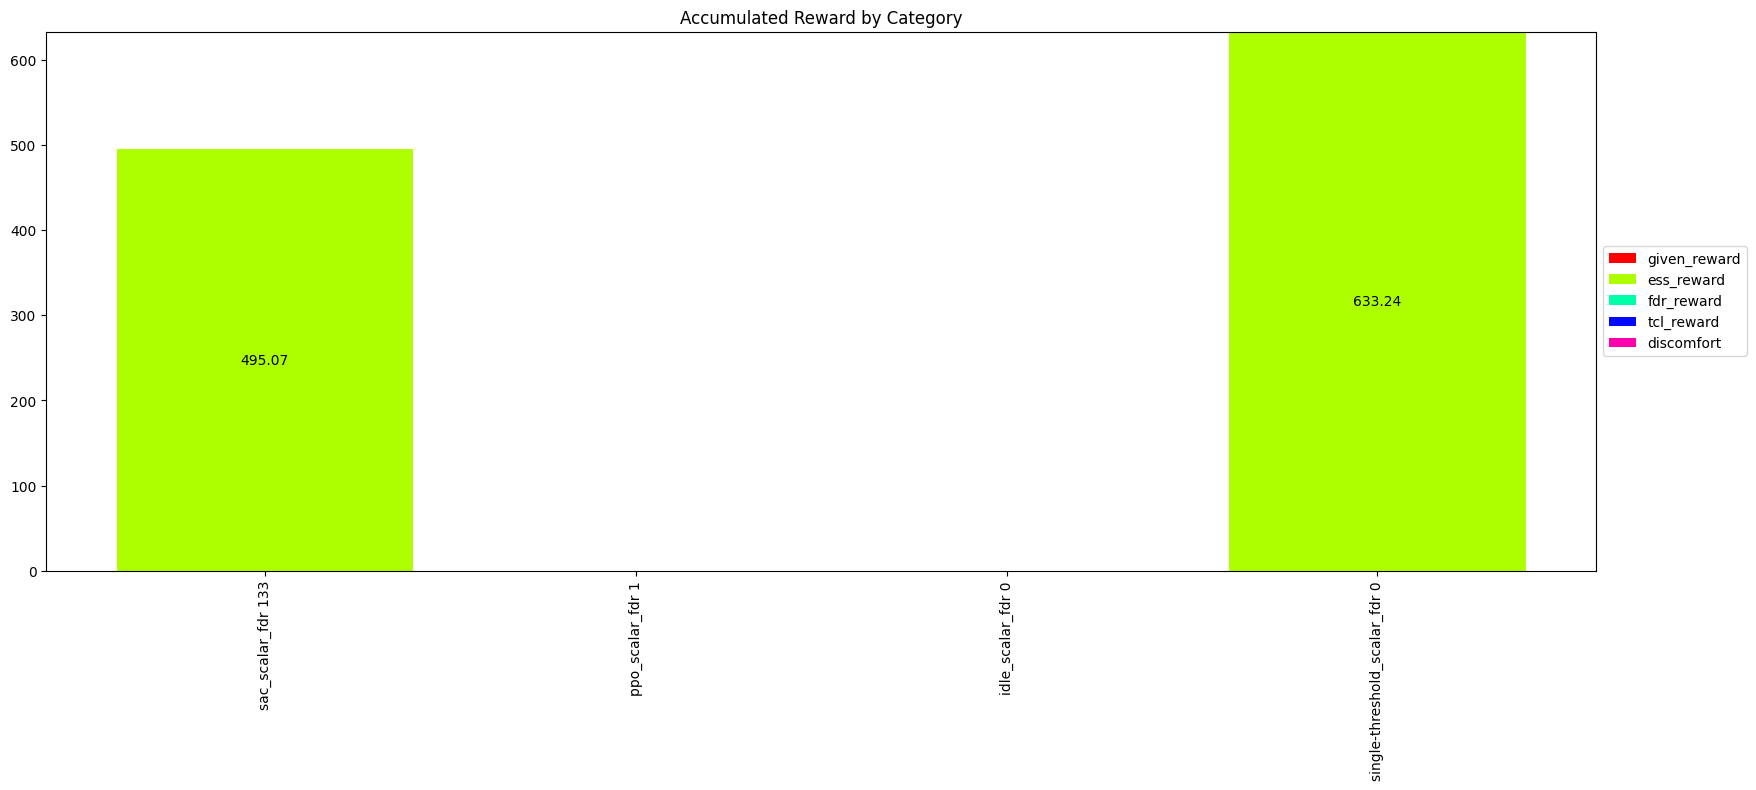

In [64]:
best_rewards_by_category(ess_data2)

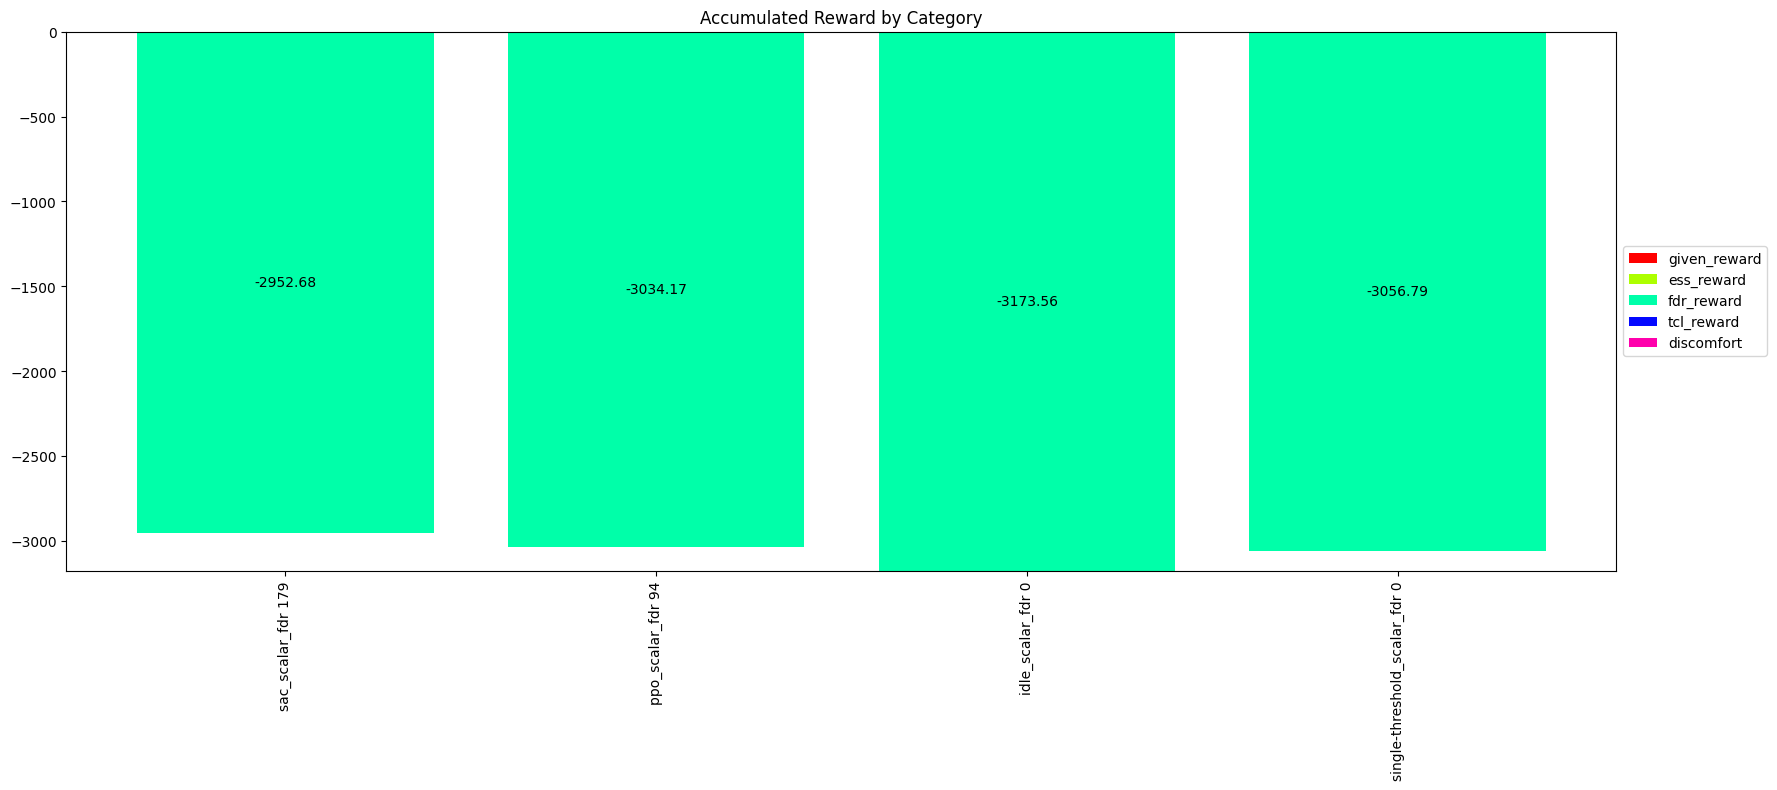

In [65]:
best_rewards_by_category(fdr_data)

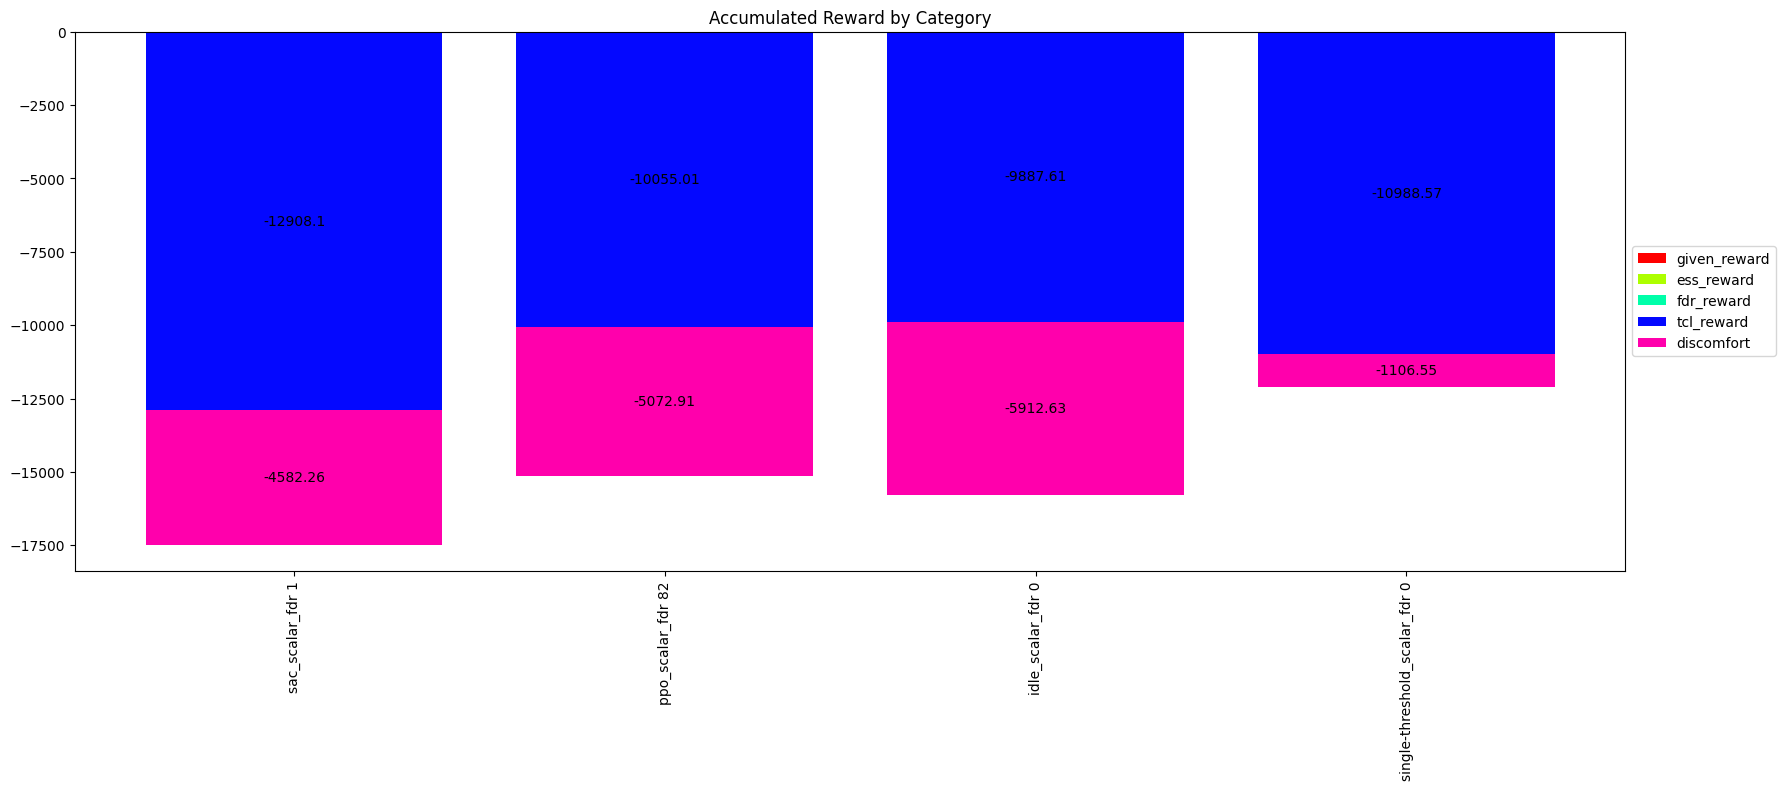

In [66]:
best_rewards_by_category(tcl_data)

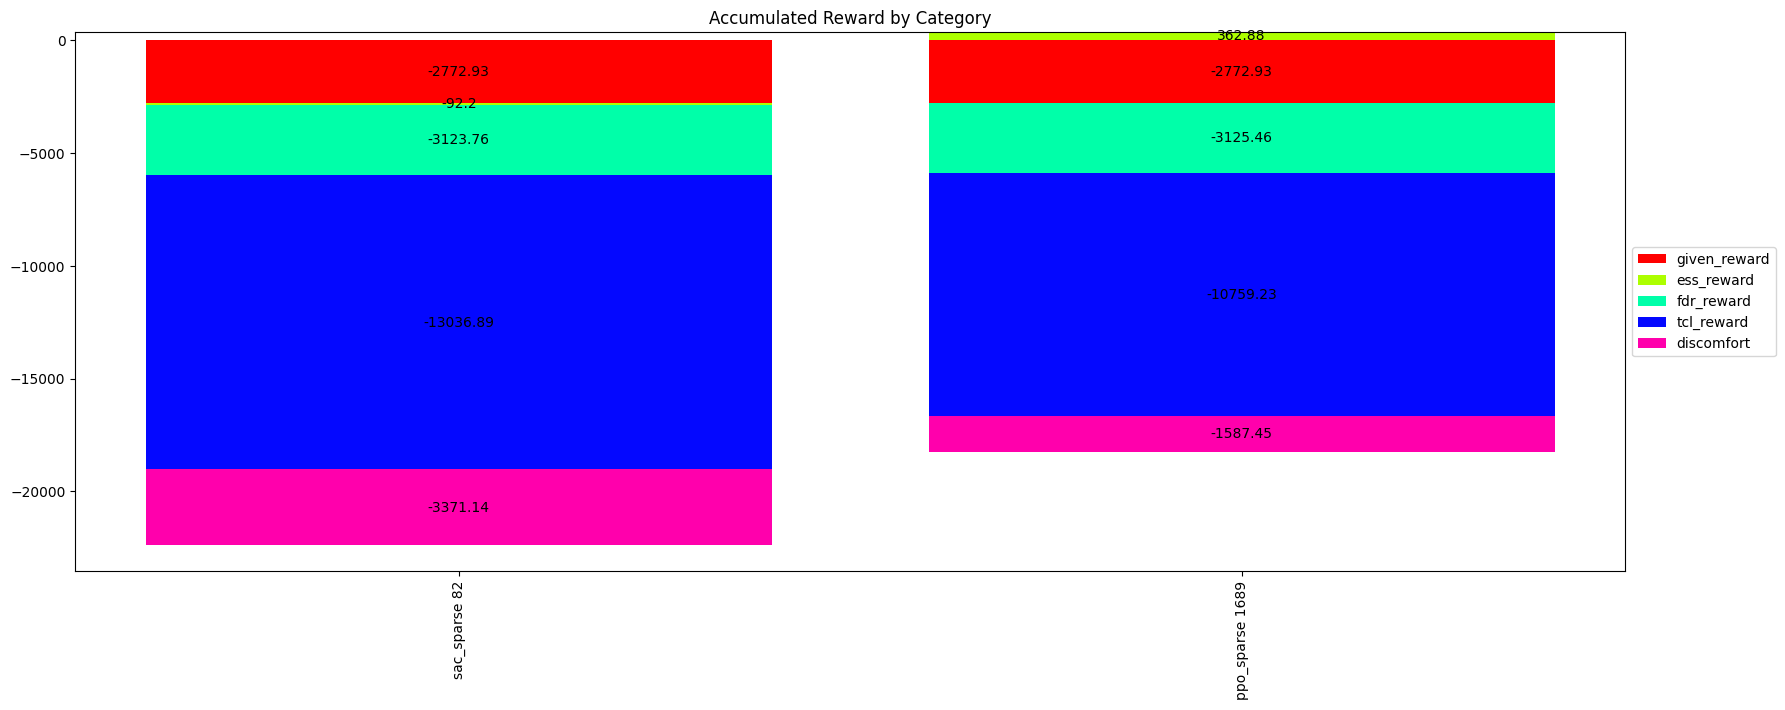

In [57]:
best_rewards_by_category(hourly_data)